# 1- The Keras Functional API

### Keras input and dense layers


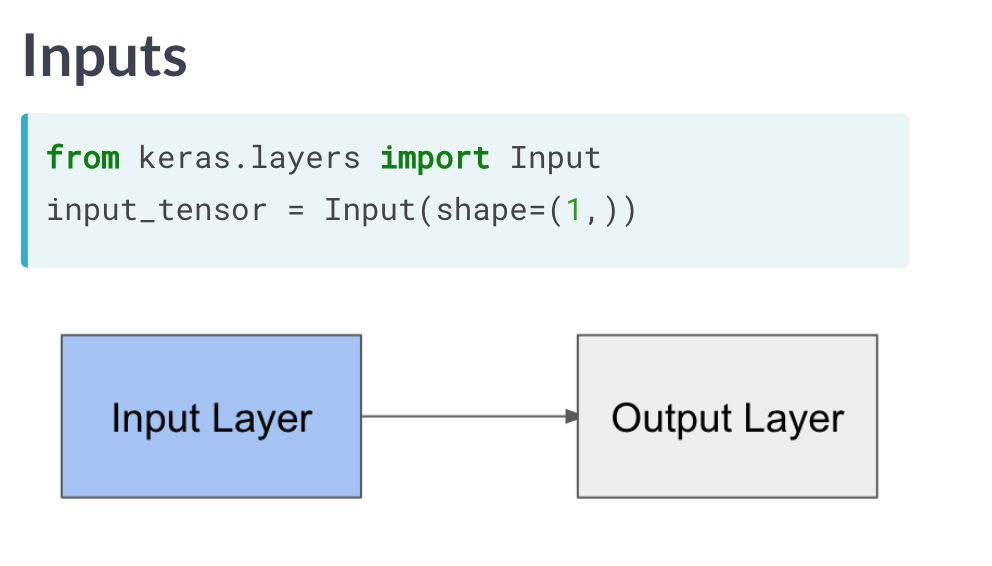

In [4]:
from IPython.display import Image
Image(filename='1.png')

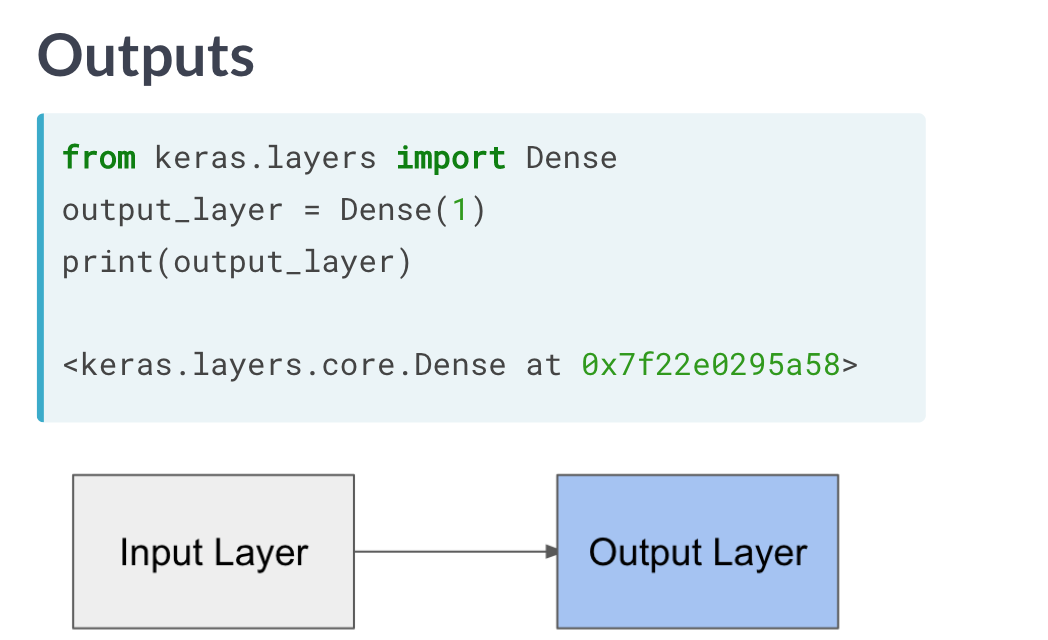

In [5]:
Image(filename='2.png')

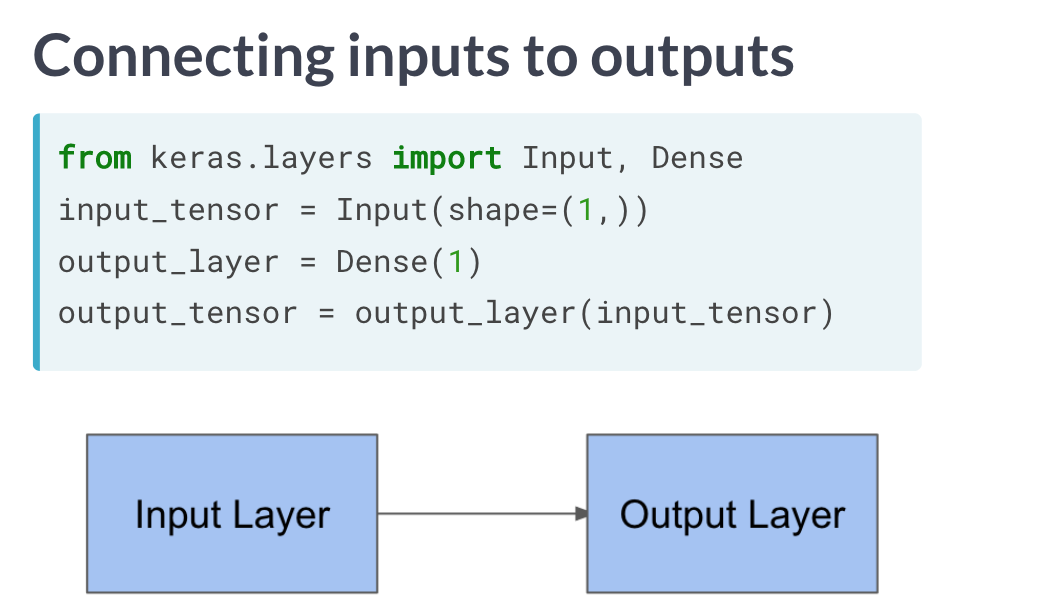

In [6]:
Image(filename='3.png')

In [7]:
# # Import Input from keras.layers
# from keras.layers import Input

# # Create an input layer of shape 1
# input_tensor = Input(shape=(1,))

In [8]:
# # Load layers
# from keras.layers import Input, Dense

# # Input layer
# input_tensor = Input(shape=(1,))

# # Dense layer
# output_layer = Dense(1)

# # Connect the dense layer to the input_tensor
# output_tensor = output_layer(input_tensor)


In [9]:
# # Load layers
# from keras.layers import Input, Dense

# # Input layer
# input_tensor = Input(shape=(1,))

# # Create a dense layer and connect the dense layer to the input_tensor in one step
# # Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
# output_tensor = Dense(1)(input_tensor)

### Build and compile a model


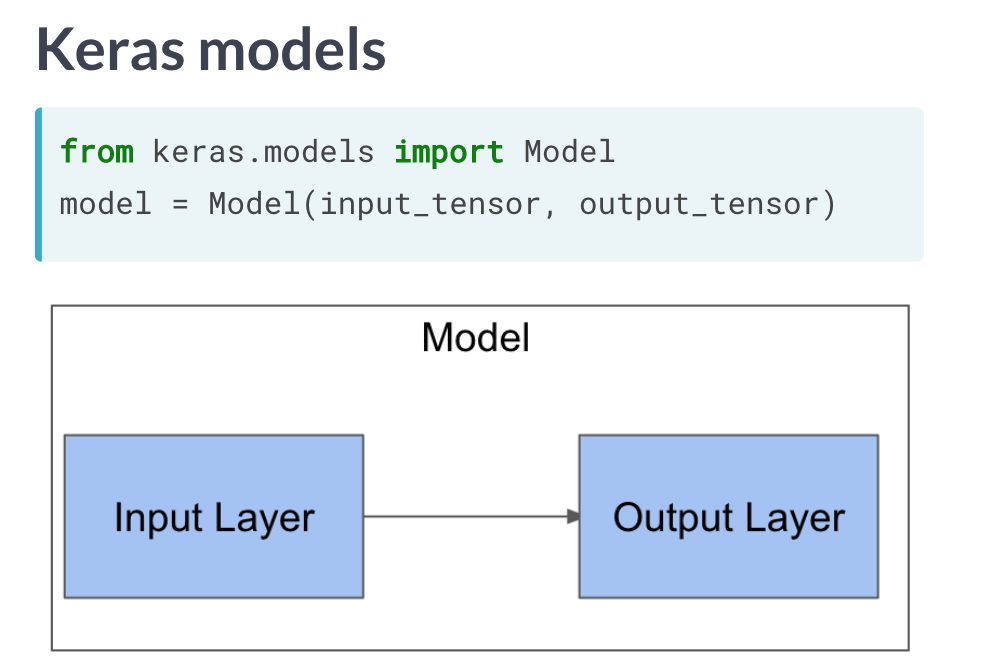

In [10]:
Image(filename='4.png')

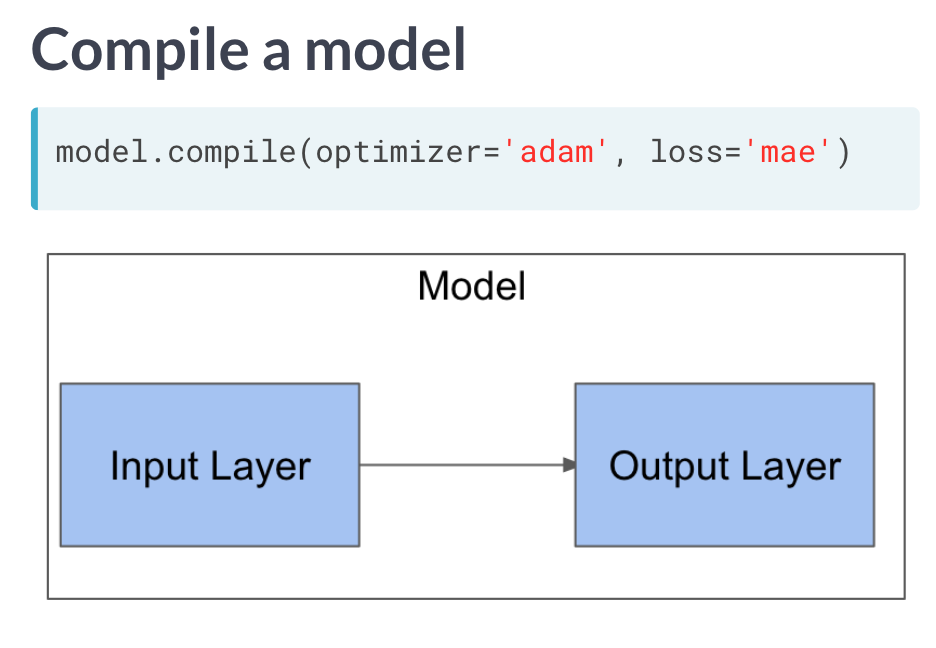

In [11]:
Image(filename='5.png')

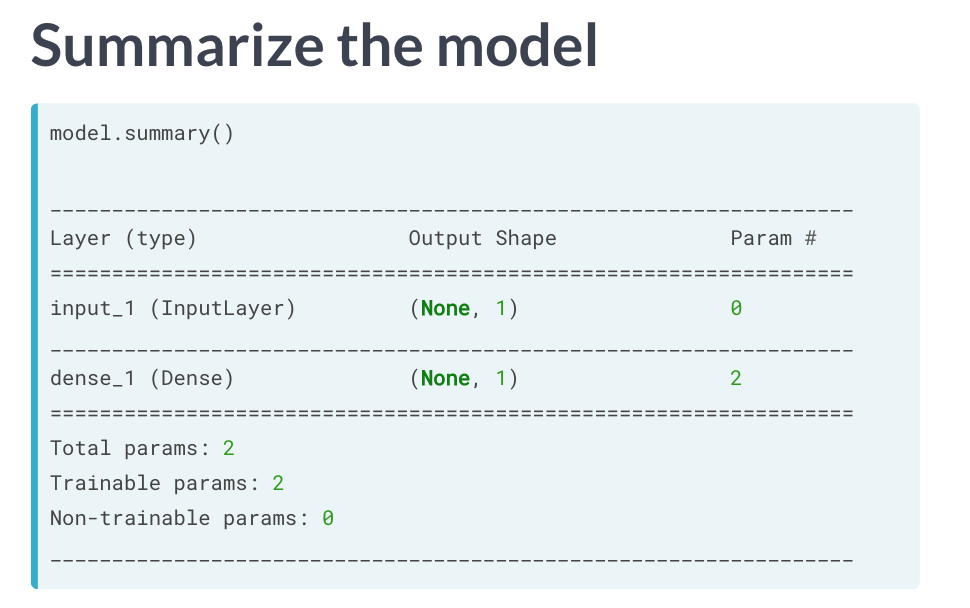

In [12]:
Image(filename='6.png')

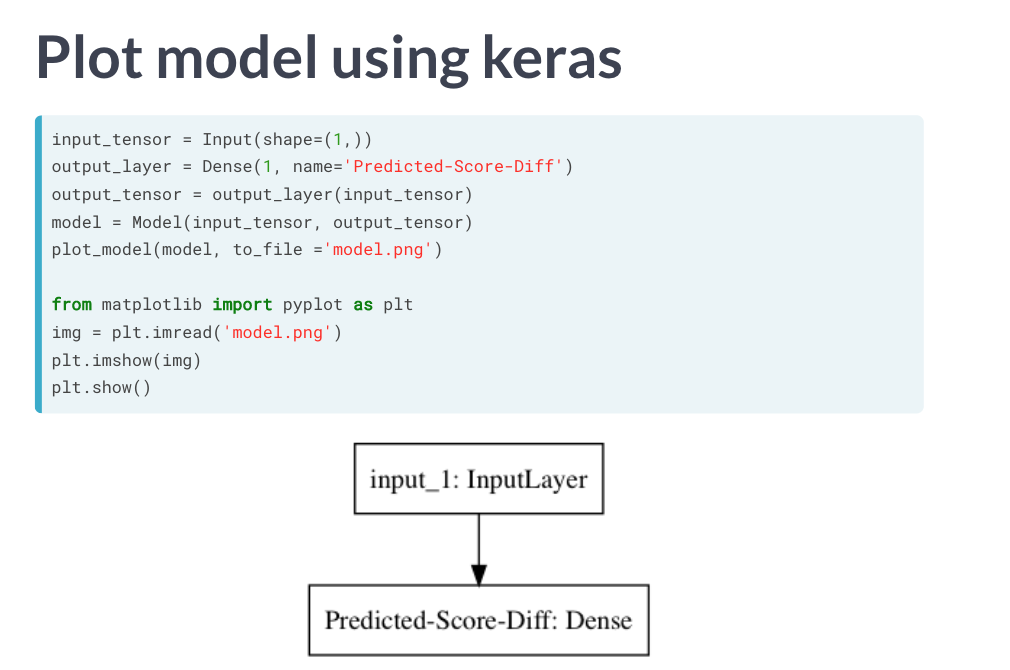

In [13]:
Image(filename='7.png')

In [14]:
# # Input/dense/output layers
# from keras.layers import Input, Dense
# input_tensor = Input(shape=(1,))
# output_tensor = Dense(1)(input_tensor)

# # Build the model
# from keras.models import Model
# model = Model(input_tensor, output_tensor)

In [15]:
# # Compile the model
# model.compile(optimizer='adam', loss='mean_absolute_error')

In [16]:
# # Import the plotting function
# from keras.utils import plot_model
# import matplotlib.pyplot as plt

# # Summarize the model
# model.summary()

# # Plot the model
# plot_model(model, to_file='model.png')

# # Display the image
# data = plt.imread('model.png')
# plt.imshow(data)
# plt.show()
# <script.py> output:
#     _________________________________________________________________
#     Layer (type)                 Output Shape              Param #   
#     =================================================================
#     Input-Layer (InputLayer)     (None, 1)                 0         
#     _________________________________________________________________
#     Output-Layer (Dense)         (None, 1)                 2         
#     =================================================================
#     Total params: 2
#     Trainable params: 2
#     Non-trainable params: 0
#     _________________________________________________________________


### Fit and evaluate a model


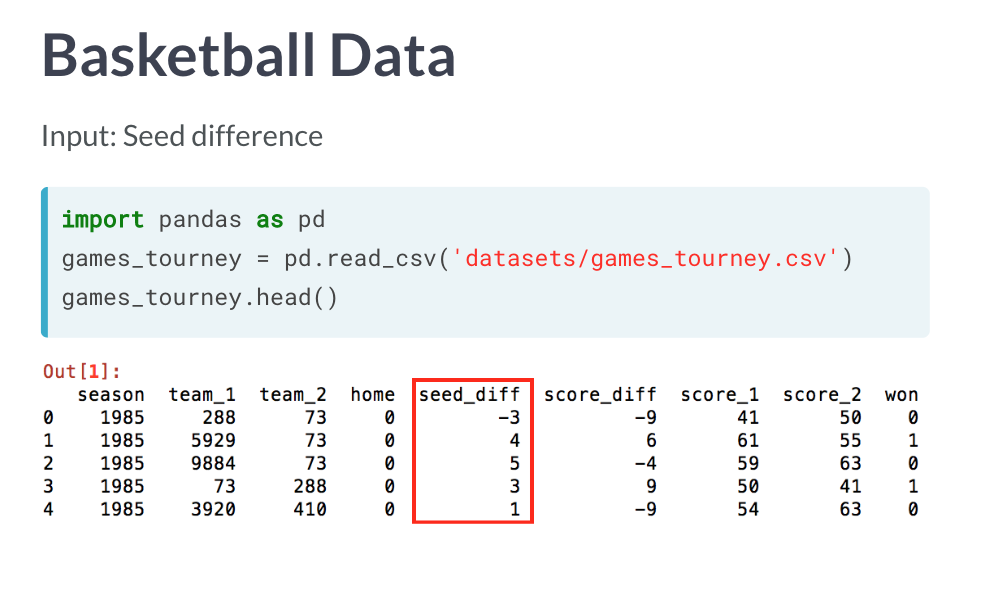

In [17]:
Image(filename='8.png')

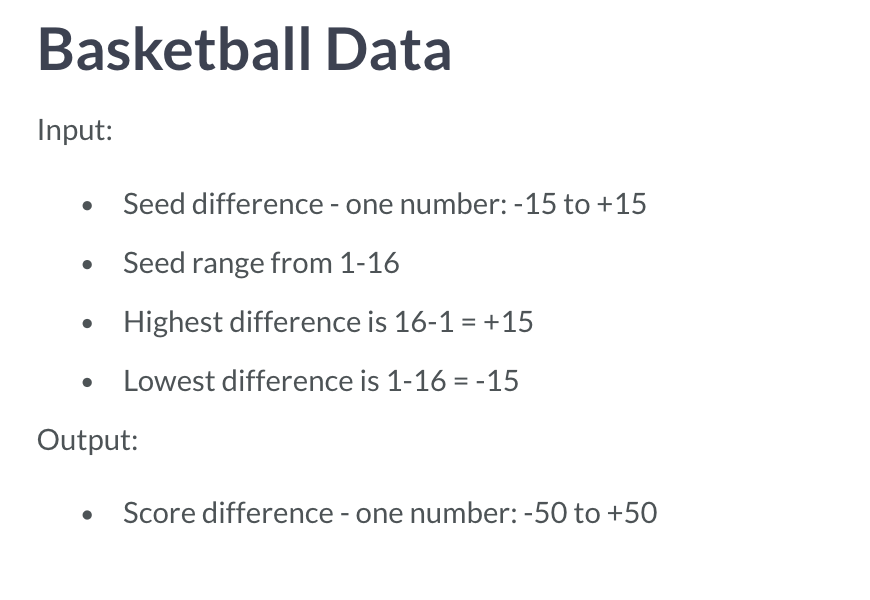

In [18]:
Image(filename='9.png')

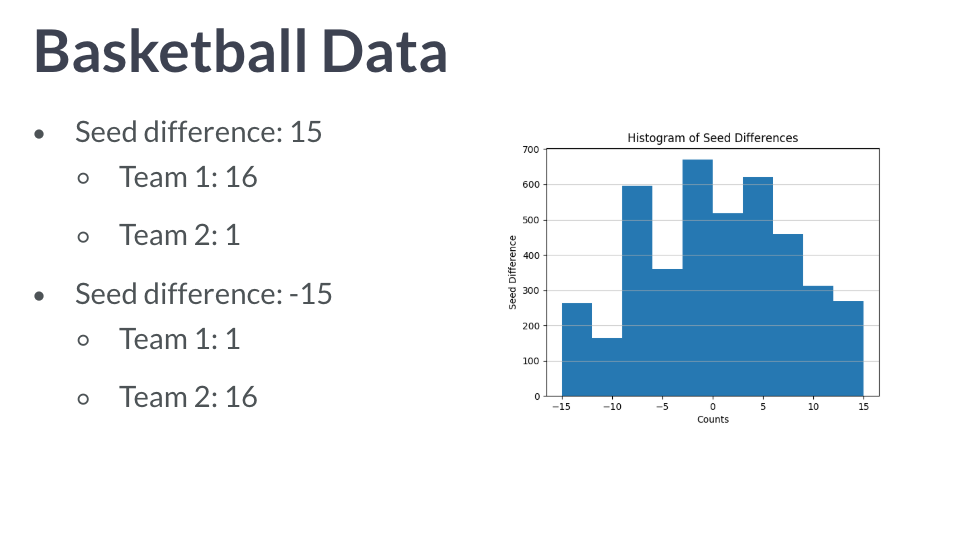

In [19]:
Image(filename='10.png')

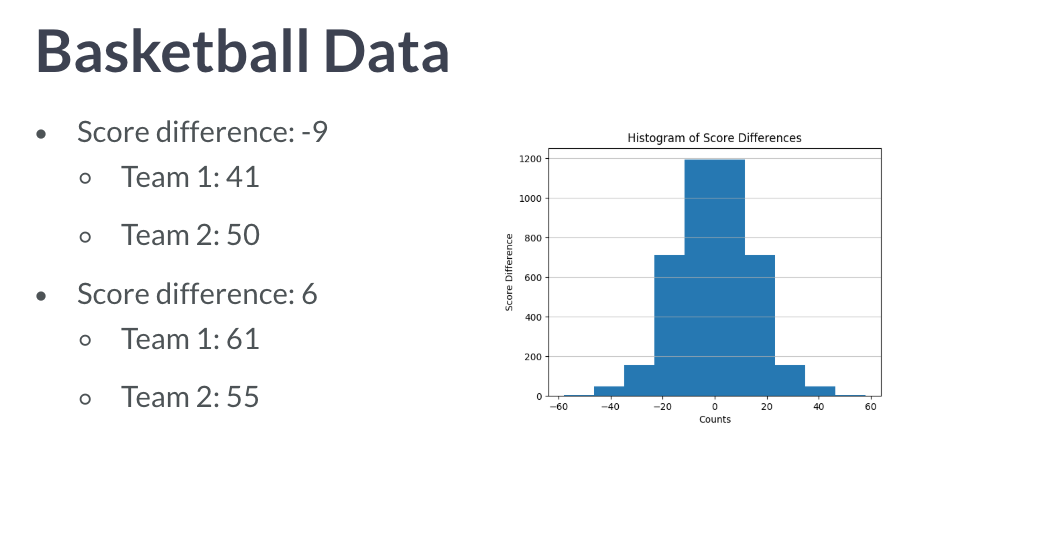

In [20]:
Image(filename='11.png')

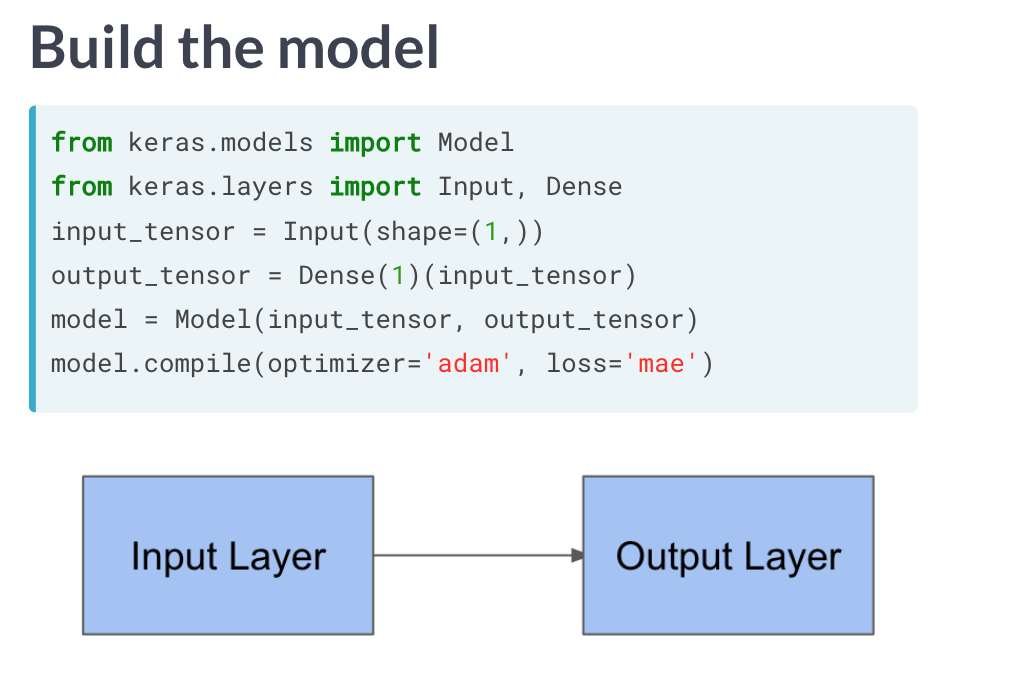

In [21]:
Image(filename='12.png')

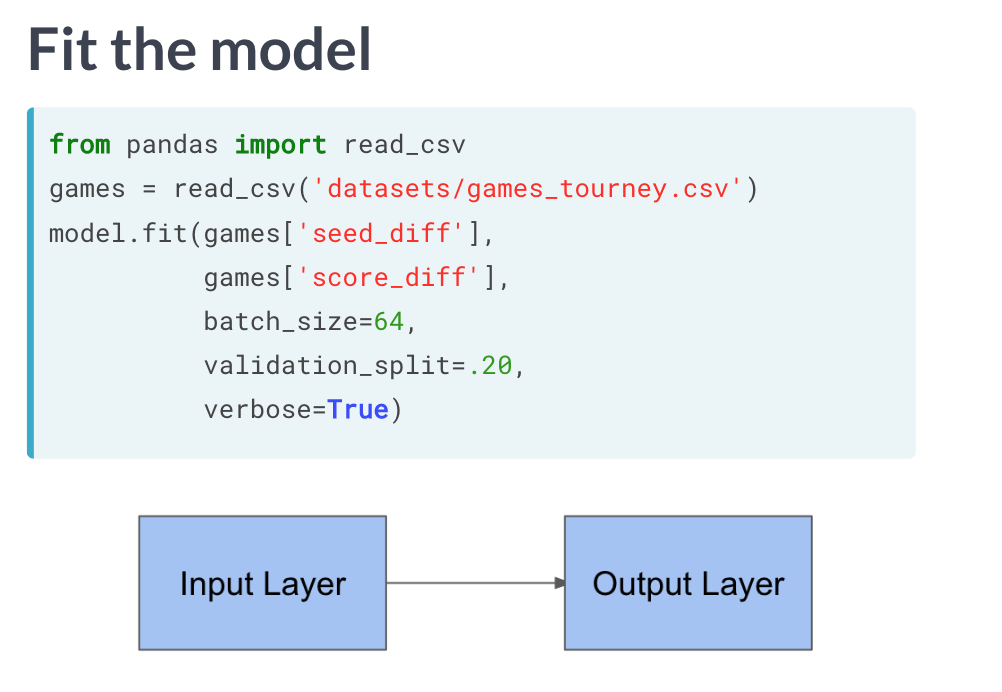

In [22]:
Image(filename='13.png')

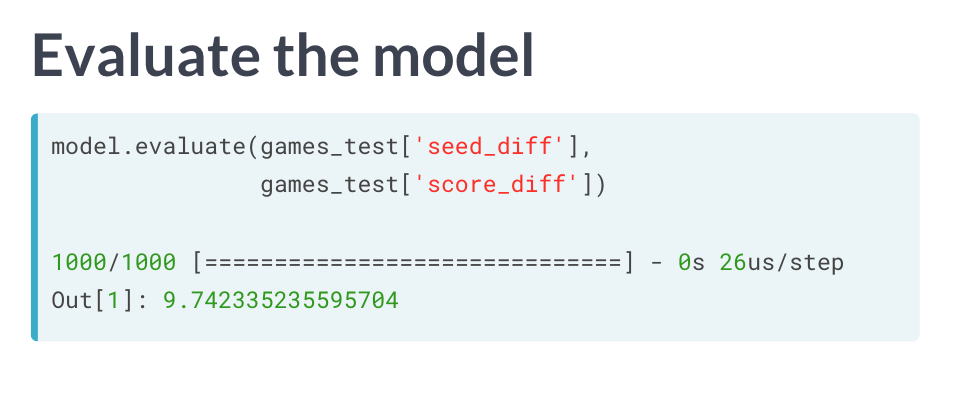

In [23]:
Image(filename='14.png')

In [24]:
# # Now fit the model
# model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
#           epochs=1,
#           batch_size=128,
#           validation_split=0.1,
#           verbose=True)

# <script.py> output:
#     Train on 3087 samples, validate on 343 samples
#     Epoch 1/1
    
#      128/3087 [>.............................] - ETA: 4s - loss: 12.6147
#     1280/3087 [===========>..................] - ETA: 0s - loss: 12.8952
#     2176/3087 [====================>.........] - ETA: 0s - loss: 12.7949
#     3072/3087 [============================>.] - ETA: 0s - loss: 12.6602
#     3087/3087 [==============================] - 0s 121us/step - loss: 12.6617 - val_loss: 11.8746


In [25]:
# # Load the X variable from the test data
# X_test = games_tourney_test['seed_diff']

# # Load the y variable from the test data
# y_test = games_tourney_test['score_diff']

# # Evaluate the model on the test data
# print(model.evaluate(X_test, y_test, verbose=False))

# <script.py> output:
#     10.06973339669147


# 2- Two Input Networks Using Categorical Embeddings, Shared Layers, and Merge Layers


### Category embeddings


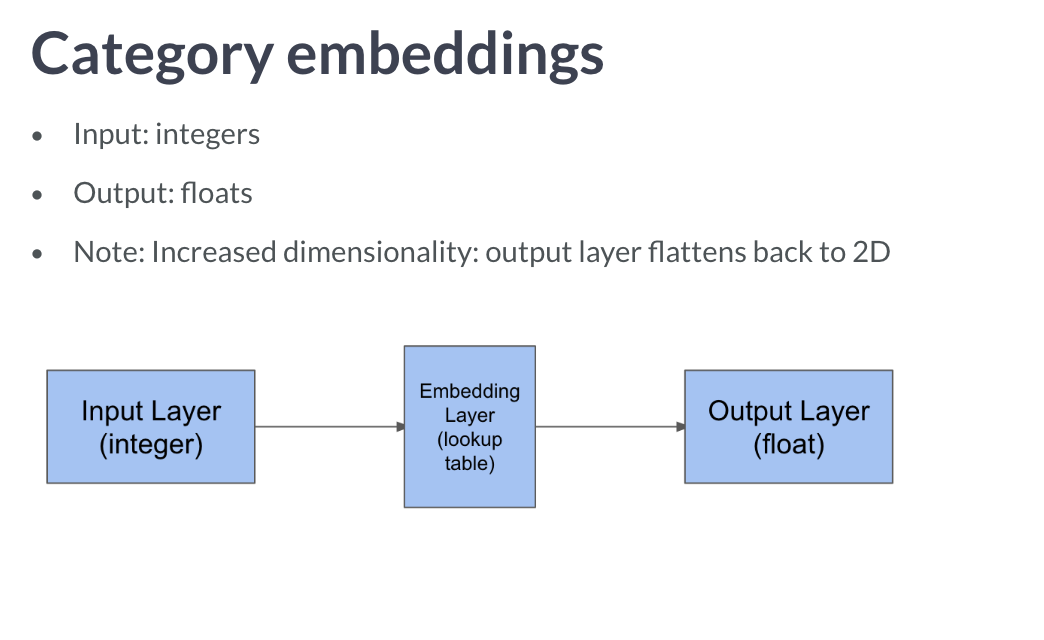

In [26]:
Image(filename='15.png')

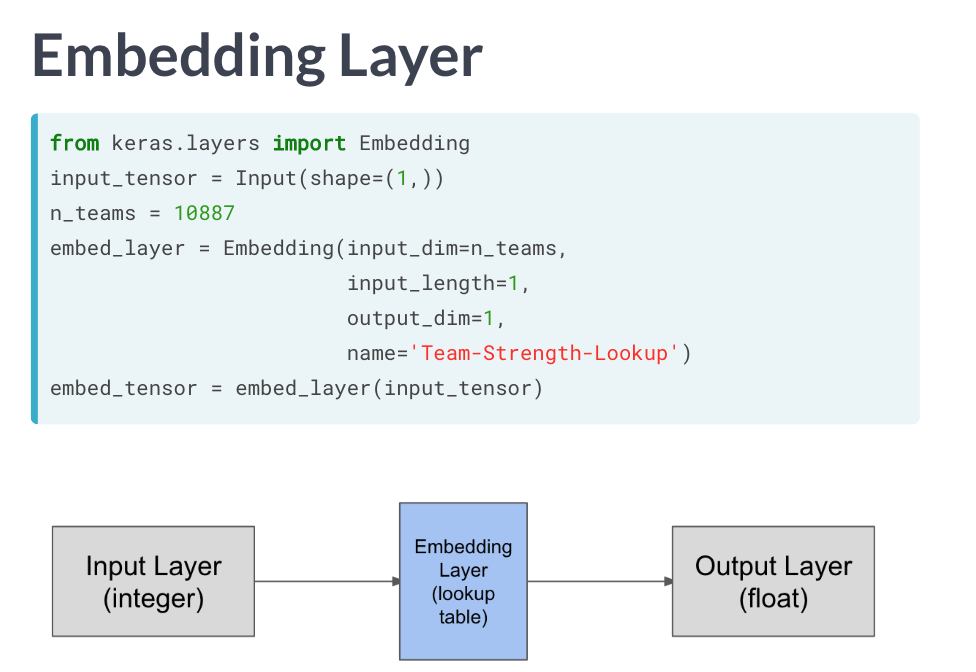

In [27]:
Image(filename='16.png')

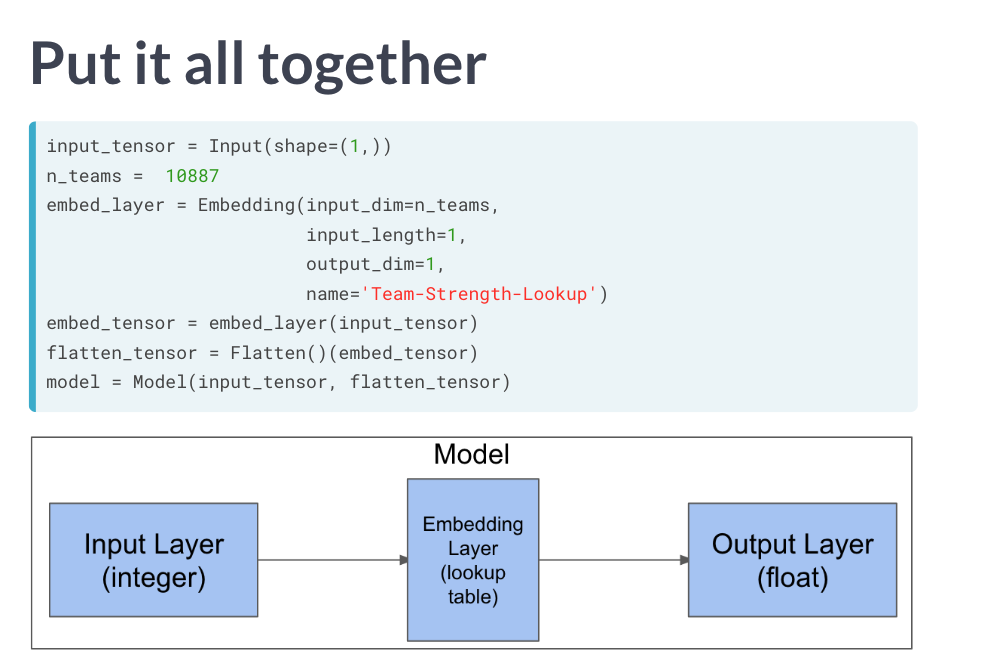

In [28]:
Image(filename='17.png')

In [29]:
# # Imports
# from keras.layers import Embedding
# from numpy import unique

# # Count the unique number of teams
# n_teams = unique(games_season['team_1']).shape[0]

# # Create an embedding layer
# team_lookup = Embedding(input_dim=n_teams,
#                         output_dim=1,
#                         input_length=1,
#                         name='Team-Strength')

In [30]:
# # Imports
# from keras.layers import Input, Embedding, Flatten
# from keras.models import Model

# # Create an input layer for the team ID
# teamid_in = Input(shape=(1,))

# # Lookup the input in the team strength embedding layer
# strength_lookup = team_lookup(teamid_in)

# # Flatten the output
# strength_lookup_flat = Flatten()(strength_lookup)

# # Combine the operations into a single, re-usable model
# team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')

### Shared layers


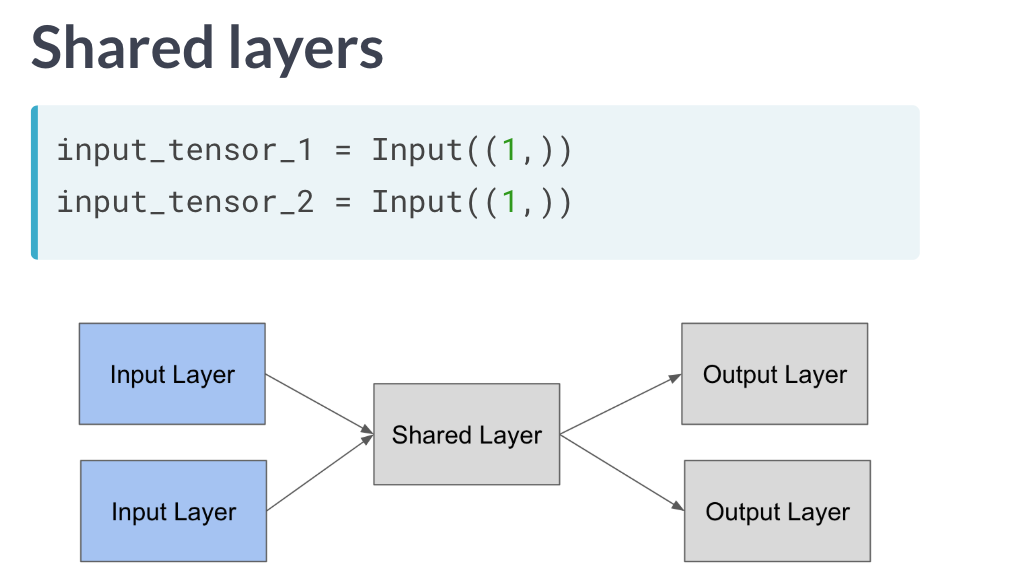

In [31]:
Image(filename='18.png')

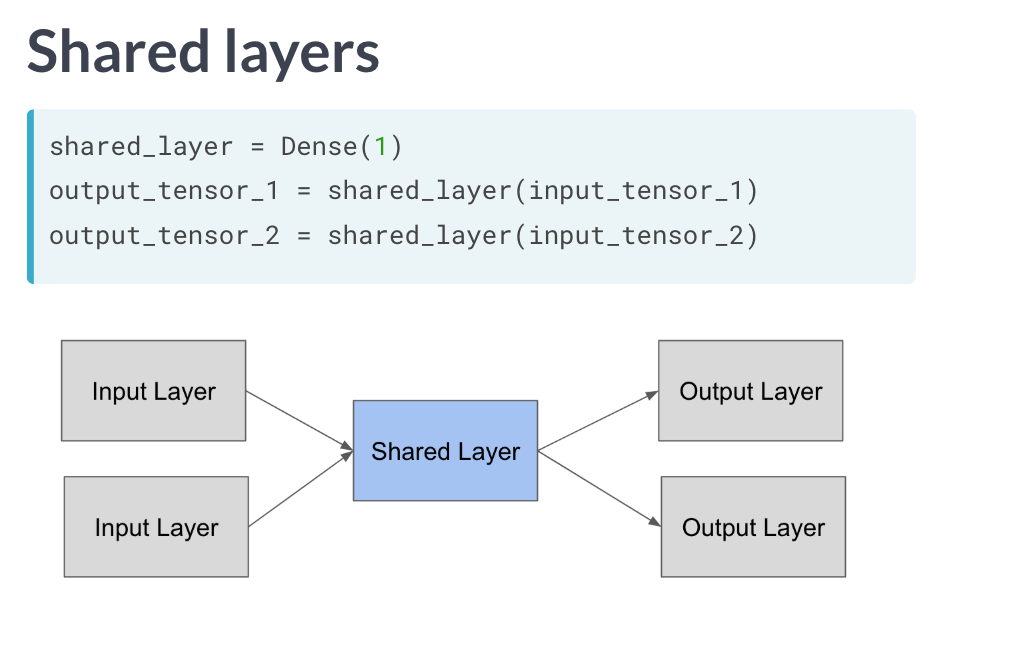

In [32]:
Image(filename='19.png')

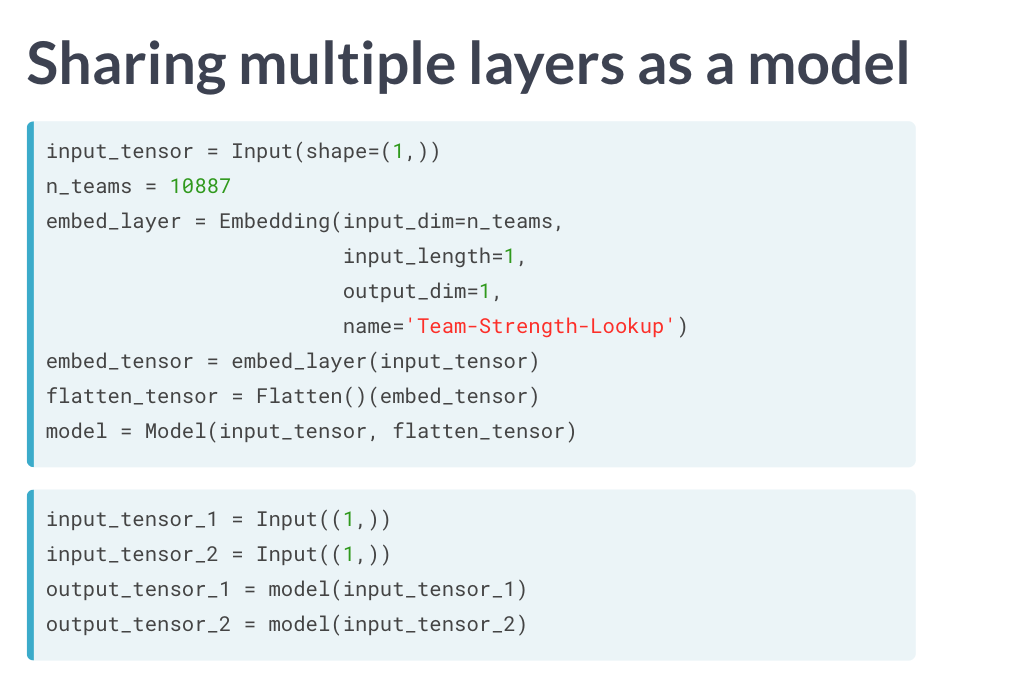

In [33]:
Image(filename='20.png')

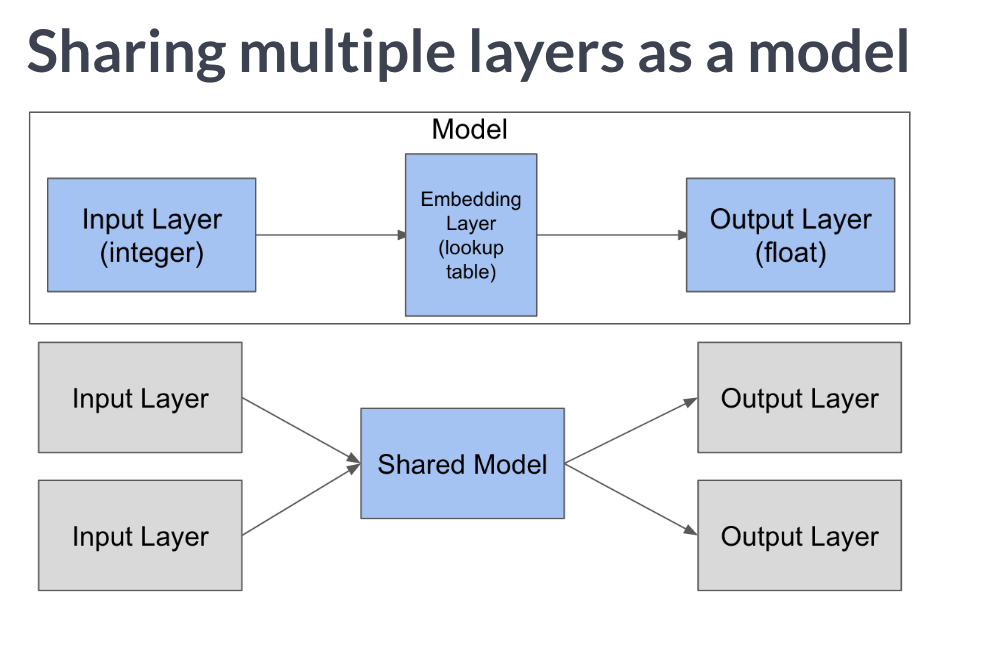

In [34]:
Image(filename='21.png')

In [35]:
# # Load the input layer from keras.layers
# from keras.layers import Input

# # Input layer for team 1
# team_in_1 = Input(shape=(1,), name='Team-1-In')

# # Separate input layer for team 2
# team_in_2 = Input(shape=(1,), name='Team-2-In')

In [36]:
# # Lookup team 1 in the team strength model
# team_1_strength = team_strength_model(team_in_1)

# # Lookup team 2 in the team strength model
# team_2_strength = team_strength_model(team_in_2)

### Merge layers


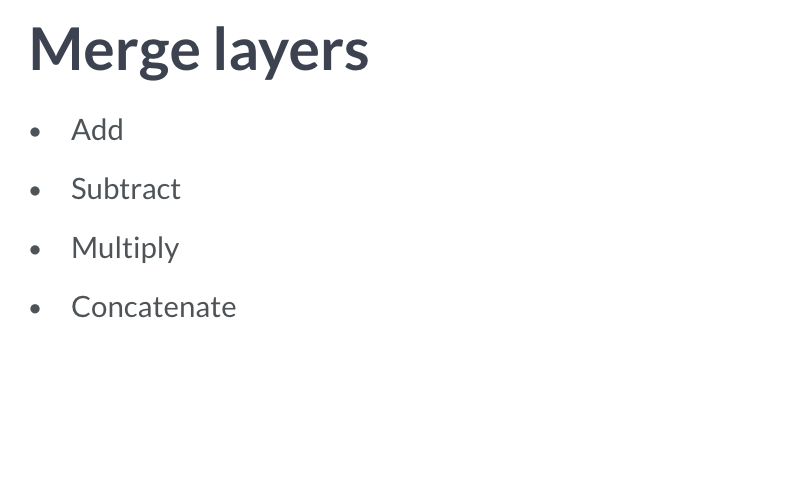

In [37]:
Image(filename='22.png')

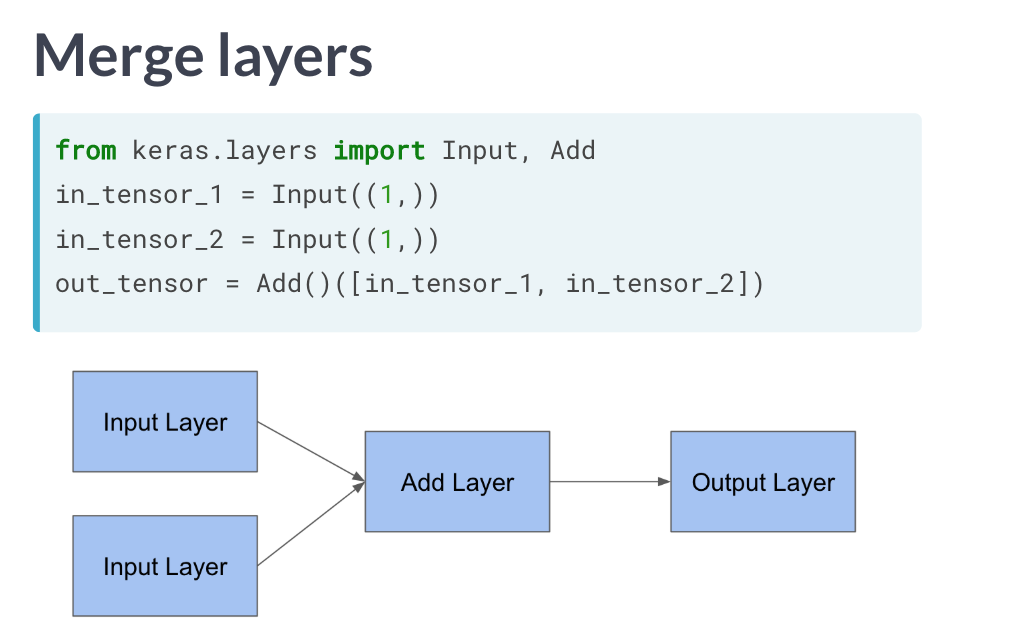

In [38]:
Image(filename='23.png')

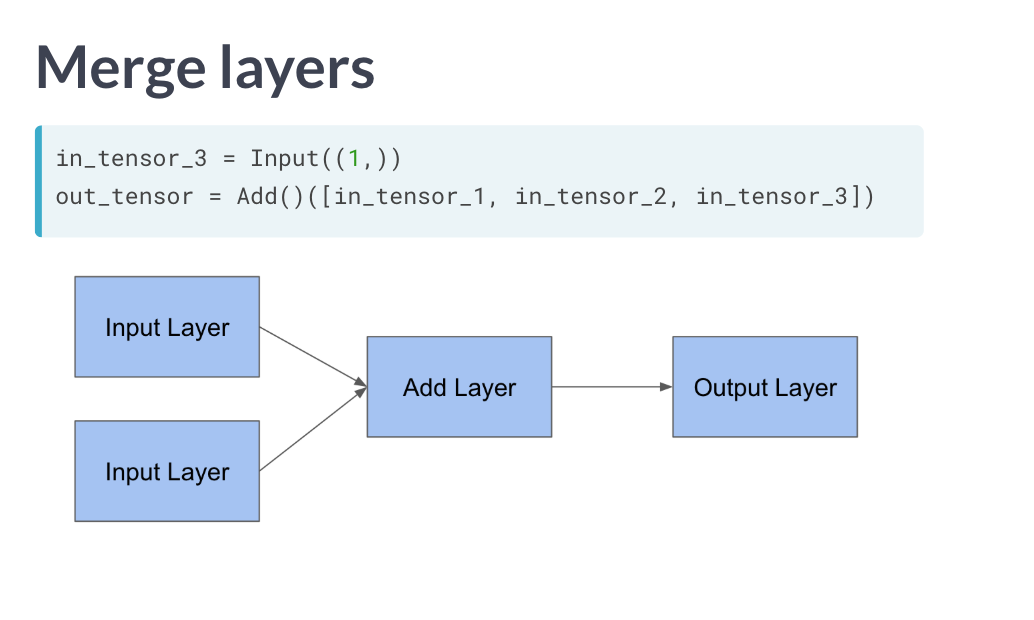

In [39]:
Image(filename='24.png')

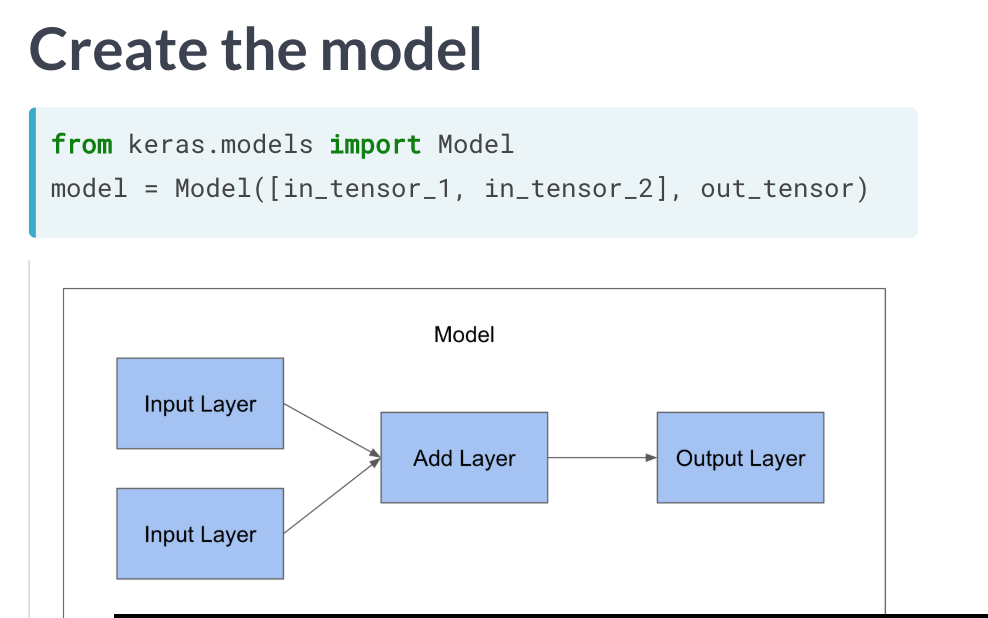

In [40]:
Image(filename='25.png')

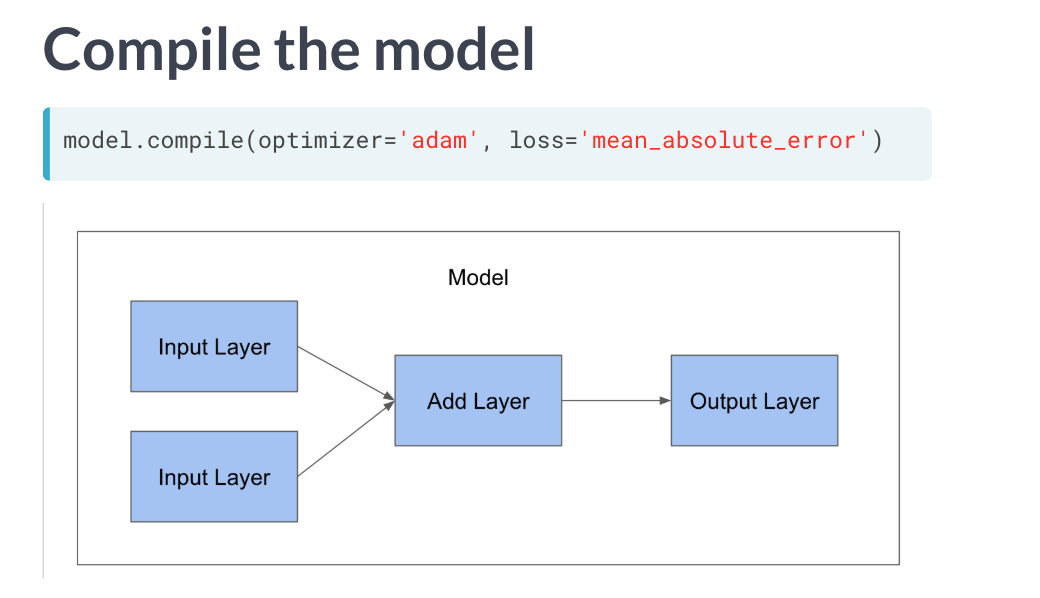

In [41]:
Image(filename='26.png')

In [42]:
# # Import the Subtract layer from keras
# from keras.layers import Subtract

# # Create a subtract layer using the inputs from the previous exercise
# score_diff = Subtract()([team_1_strength, team_2_strength])

In [43]:
# # Imports
# from keras.layers import Subtract
# from keras.models import Model

# # Subtraction layer from previous exercise
# score_diff = Subtract()([team_1_strength, team_2_strength])

# # Create the model
# model = Model([team_in_1, team_in_2], score_diff)

# # Compile the model
# model.compile(optimizer = 'adam', loss= 'mean_absolute_error')

### Predict from your model


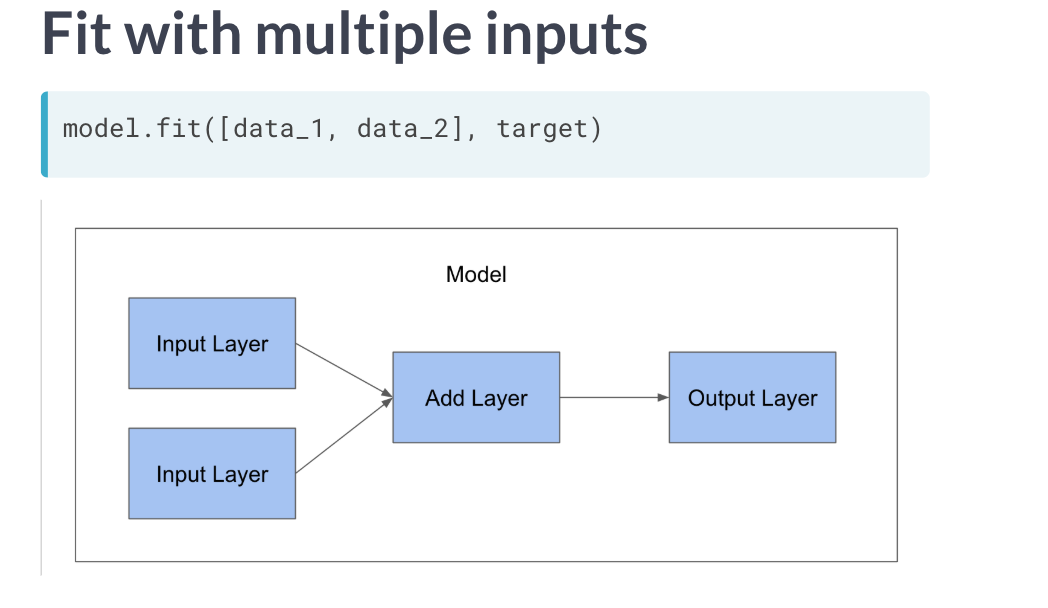

In [44]:
Image(filename='27.png')

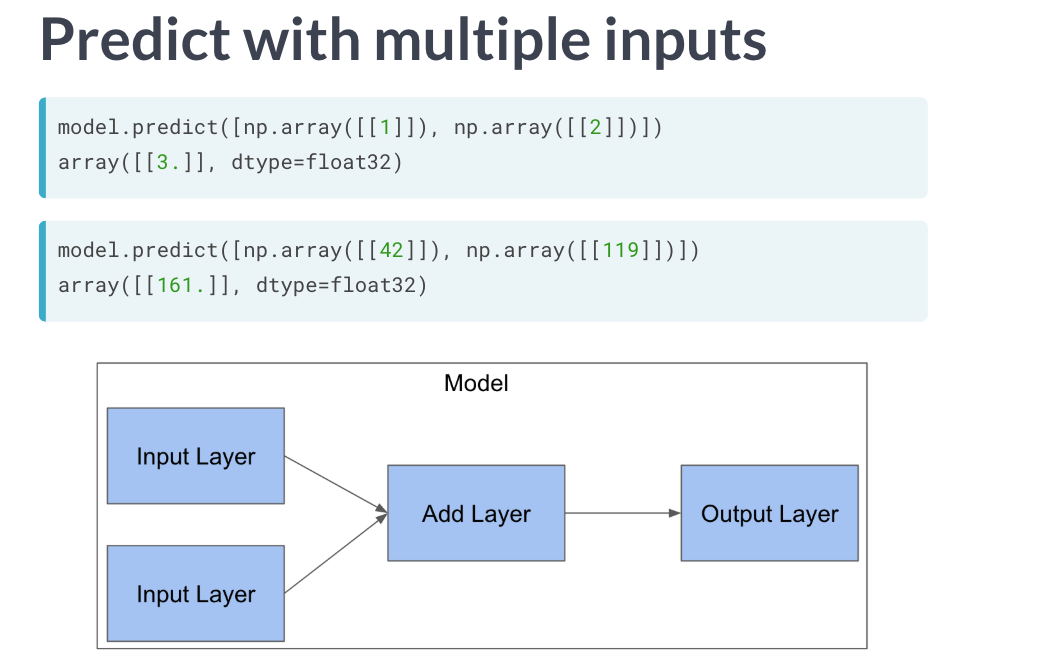

In [45]:
Image(filename='28.png')

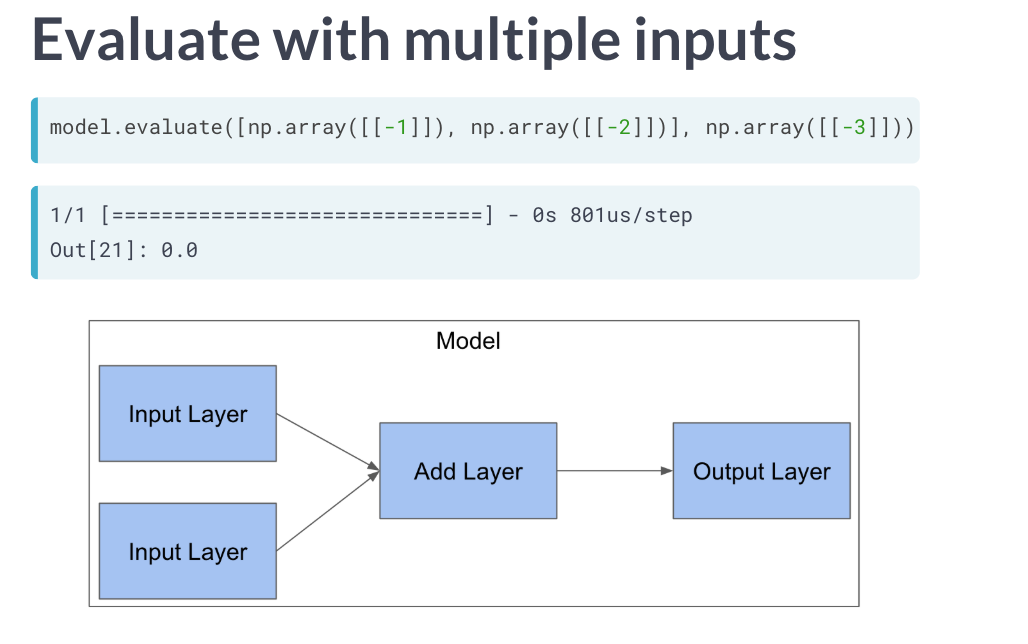

In [46]:
Image(filename='29.png')

In [47]:
# # Get the team_1 column from the regular season data
# input_1 = games_season['team_1']

# # Get the team_2 column from the regular season data
# input_2 = games_season['team_2']

# # Fit the model to input 1 and 2, using score diff as a target
# model.fit([input_1, input_2],
#           games_season['score_diff'],
#           epochs=1,
#           batch_size=2048,
#           validation_split=0.10,
#           verbose=True)
#     Train on 280960 samples, validate on 31218 samples
#     Epoch 1/1
    
#       2048/280960 [..............................] - ETA: 12s - loss: 12.0254
#      34816/280960 [==>...........................] - ETA: 0s - loss: 12.2352 
#      69632/280960 [======>.......................] - ETA: 0s - loss: 12.1566
#     104448/280960 [==========>...................] - ETA: 0s - loss: 12.1272
#     141312/280960 [==============>...............] - ETA: 0s - loss: 12.1298
#     178176/280960 [==================>...........] - ETA: 0s - loss: 12.1256
#     215040/280960 [=====================>........] - ETA: 0s - loss: 12.1222
#     249856/280960 [=========================>....] - ETA: 0s - loss: 12.1239
#     278528/280960 [============================>.] - ETA: 0s - loss: 12.1204
#     280960/280960 [==============================] - 1s 2us/step - loss: 12.1203 - val_loss: 11.8384


In [48]:
# # Get team_1 from the tournament data
# input_1 = games_tourney['team_1']

# # Get team_2 from the tournament data
# input_2 = games_tourney['team_2']

# # Evaluate the model using these inputs
# print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=False))

# 3- Multiple Inputs: 3 Inputs (and Beyond!)


### Three-input models


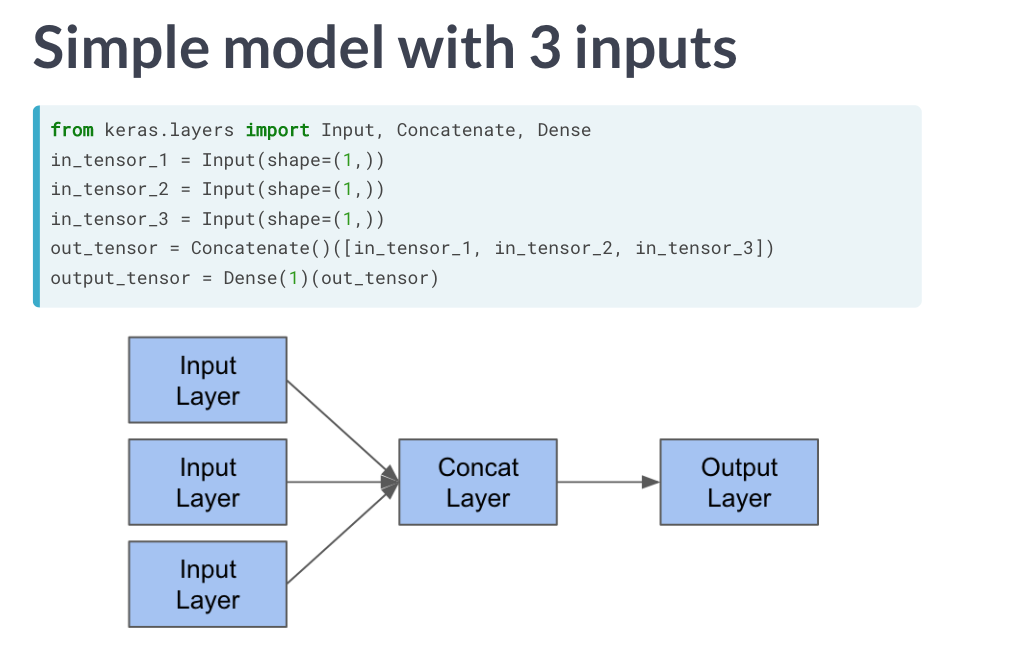

In [49]:
Image(filename='30.png')

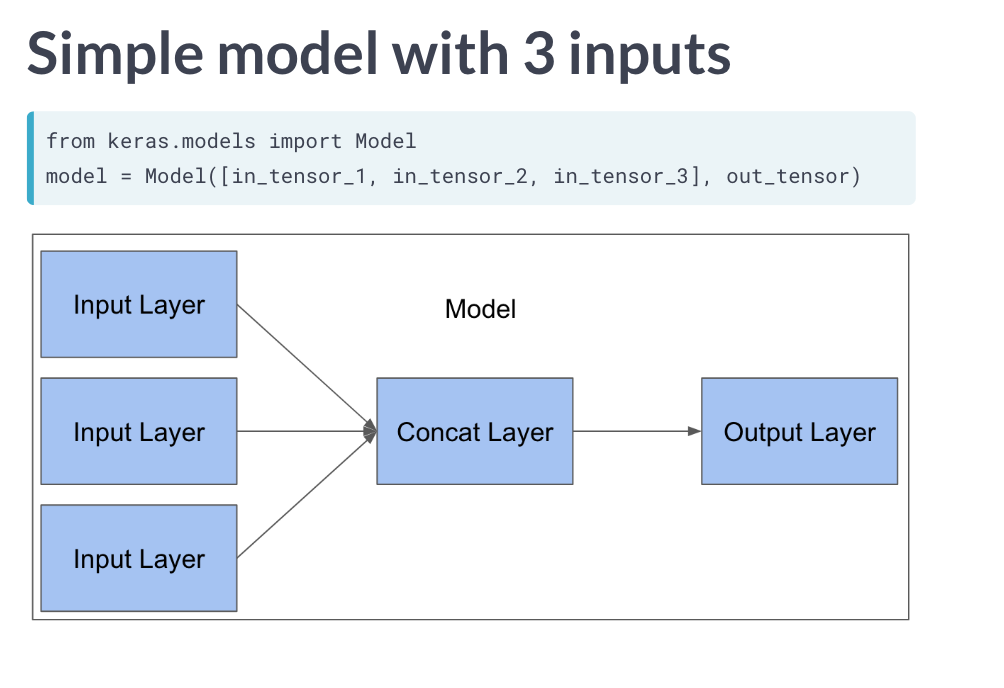

In [50]:
Image(filename='31.png')

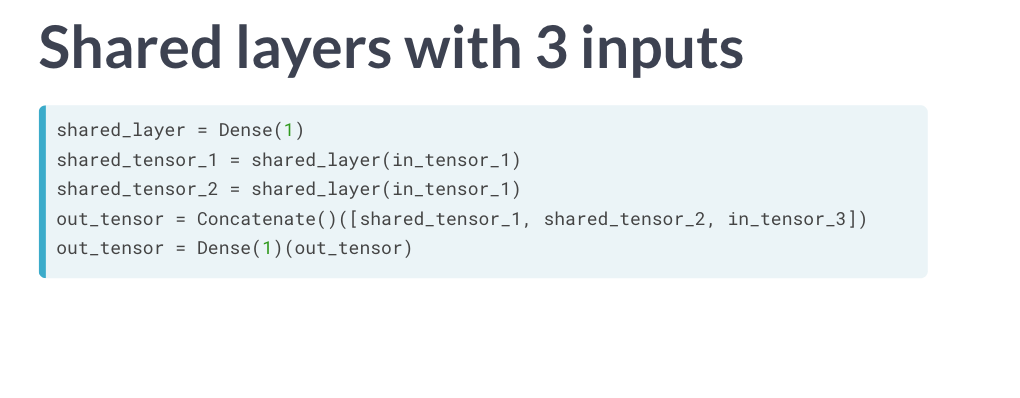

In [51]:
Image(filename='32.png')

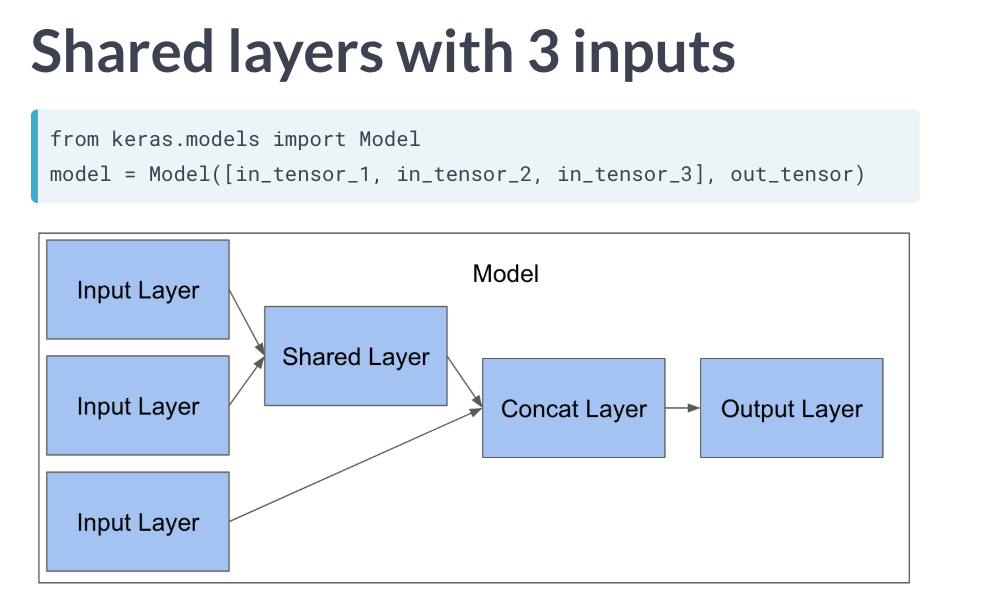

In [52]:
Image(filename='33.png')

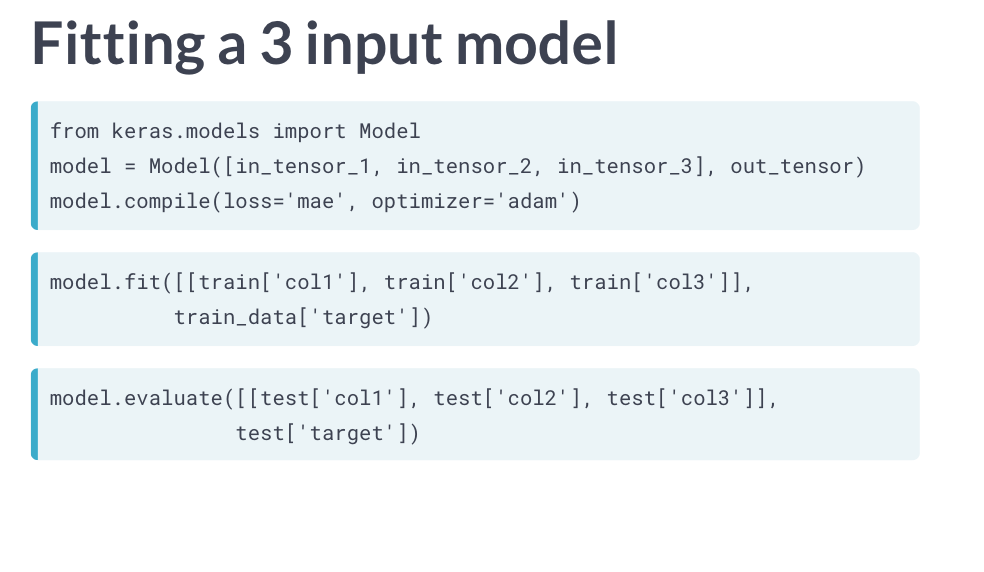

In [53]:
Image(filename='34.png')

In [54]:
# # Create an Input for each team
# team_in_1 = Input(shape=(1,), name='Team-1-In')
# team_in_2 = Input(shape=(1,), name='Team-2-In')

# # Create an input for home vs away
# home_in = Input(shape=(1,), name='Home-In')

# # Lookup the team inputs in the team strength model
# team_1_strength = team_strength_model(team_in_1)
# team_2_strength = team_strength_model(team_in_2)

# # Combine the team strengths with the home input using a Concatenate layer, then add a Dense layer
# out = Concatenate()([team_1_strength, team_2_strength, home_in])
# out = Dense(1)(out)

In [55]:
# # Import the model class
# from keras.models import Model

# # Make a Model
# model = Model([team_in_1, team_in_2, home_in], out)

# # Compile the model
# model.compile(optimizer='adam', loss='mean_absolute_error')

In [56]:
# # Fit the model to the games_season dataset
# model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
#           games_season['score_diff'],
#           epochs=1,
#           verbose=True,
#           validation_split=.10,
#           batch_size=2048)

# # Evaluate the model on the games_tourney dataset
# print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
#                games_tourney['score_diff'], verbose=False))

### Summarizing and plotting models


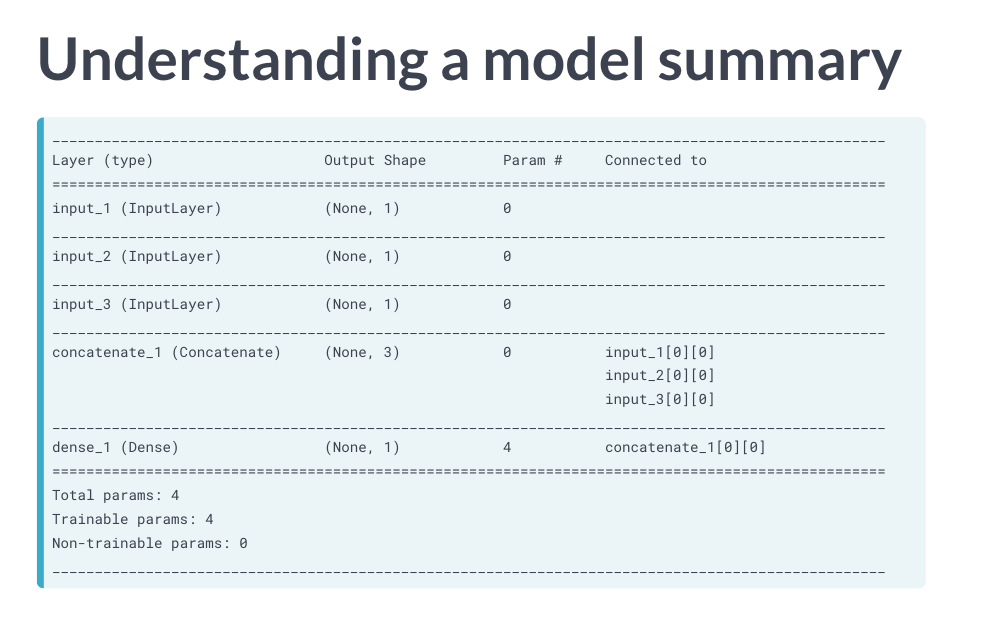

In [57]:
Image(filename='35.png')

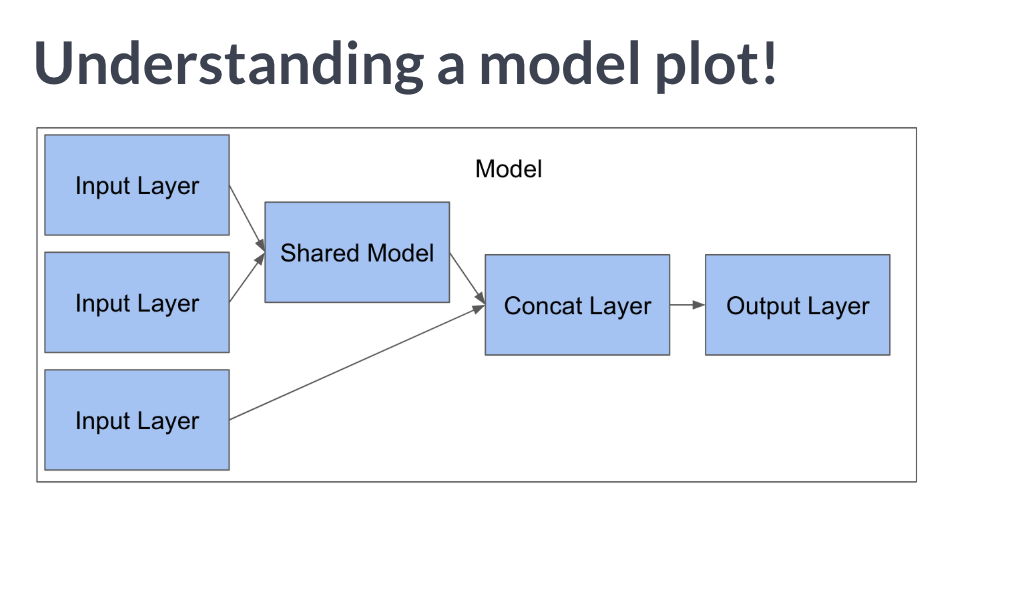

In [58]:
Image(filename='36.png')

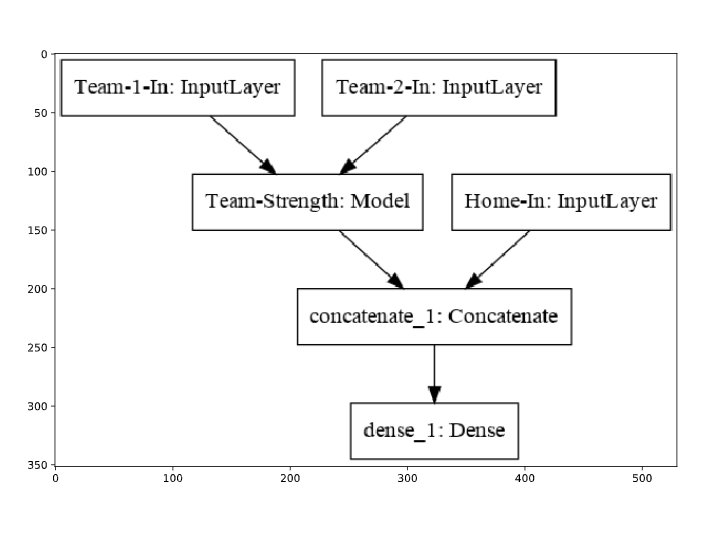

In [59]:
# # Imports
# import matplotlib.pyplot as plt
# from keras.utils import plot_model

# # Plot the model
# plot_model(model, to_file='model.png')

# # Display the image
# data = plt.imread('model.png')
# plt.imshow(data)
# plt.show()

Image(filename='37.png')

### Stacking models


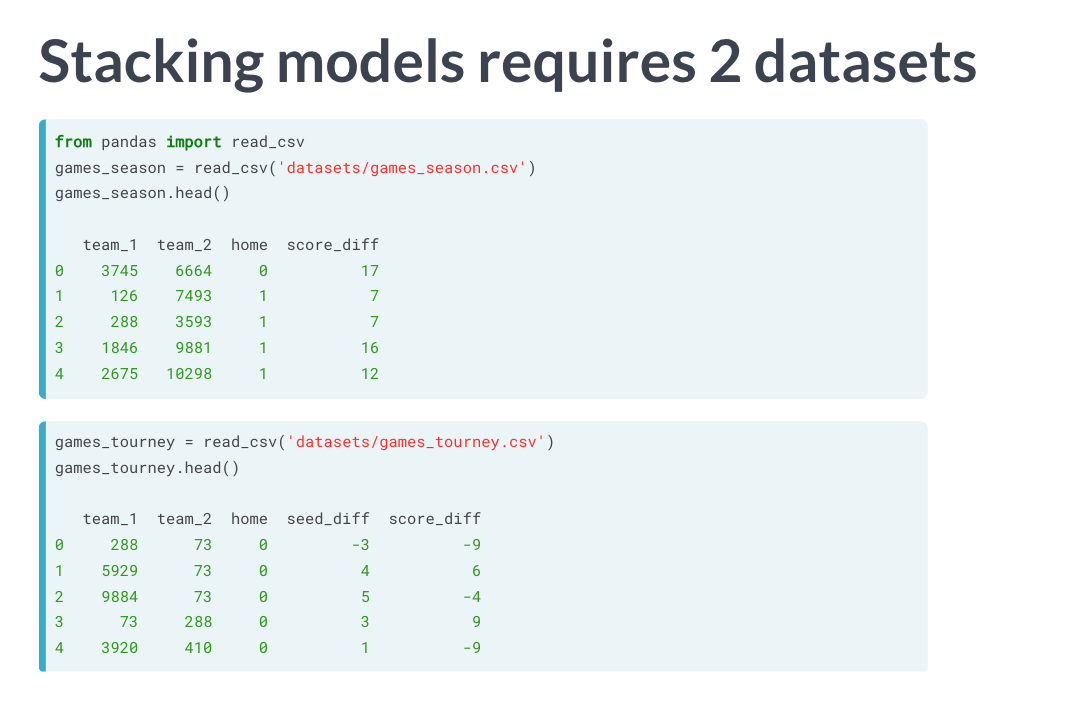

In [60]:
Image(filename='38.png')

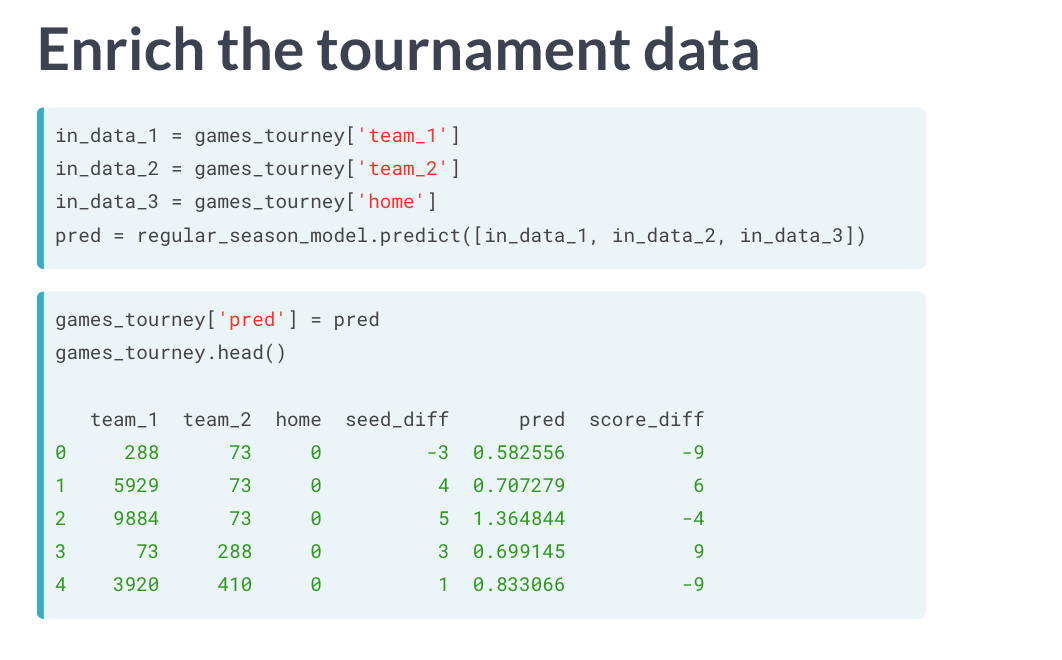

In [61]:
Image(filename='39.png')

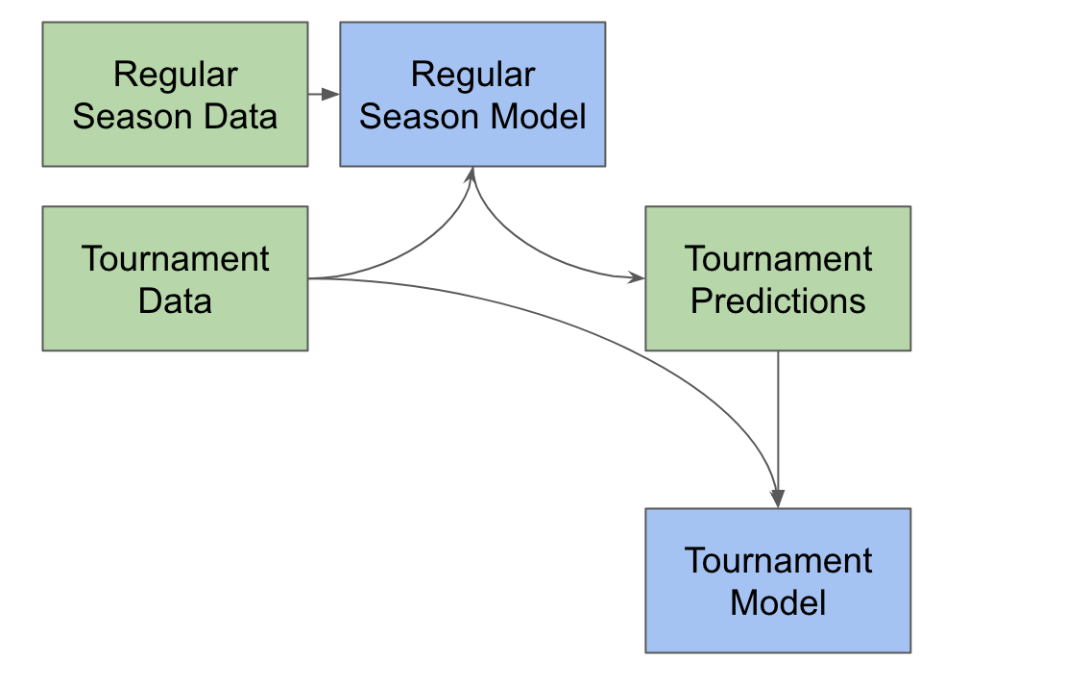

In [62]:
Image(filename='40.png')

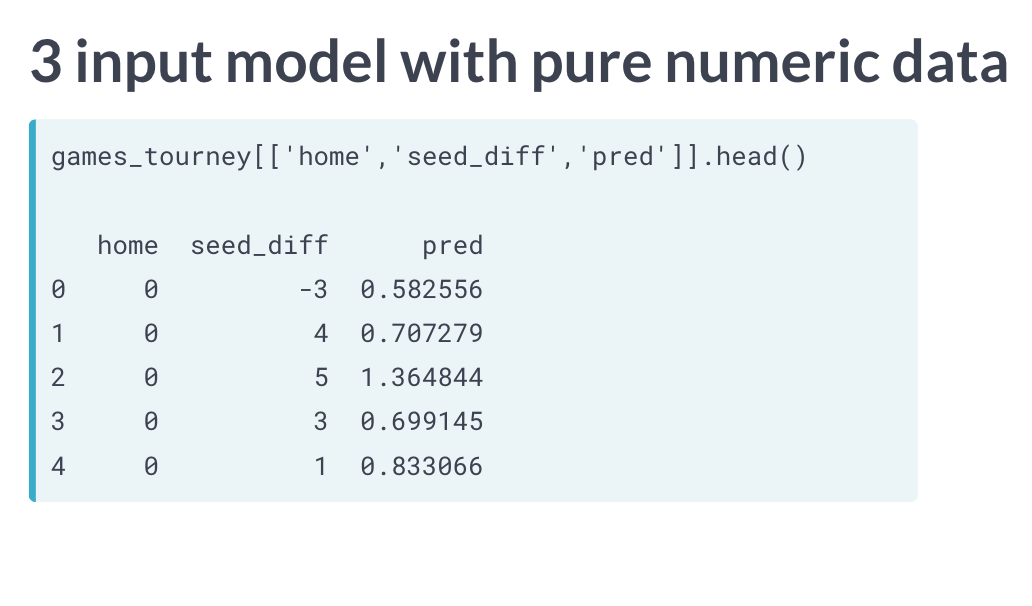

In [63]:
Image(filename='41.png')

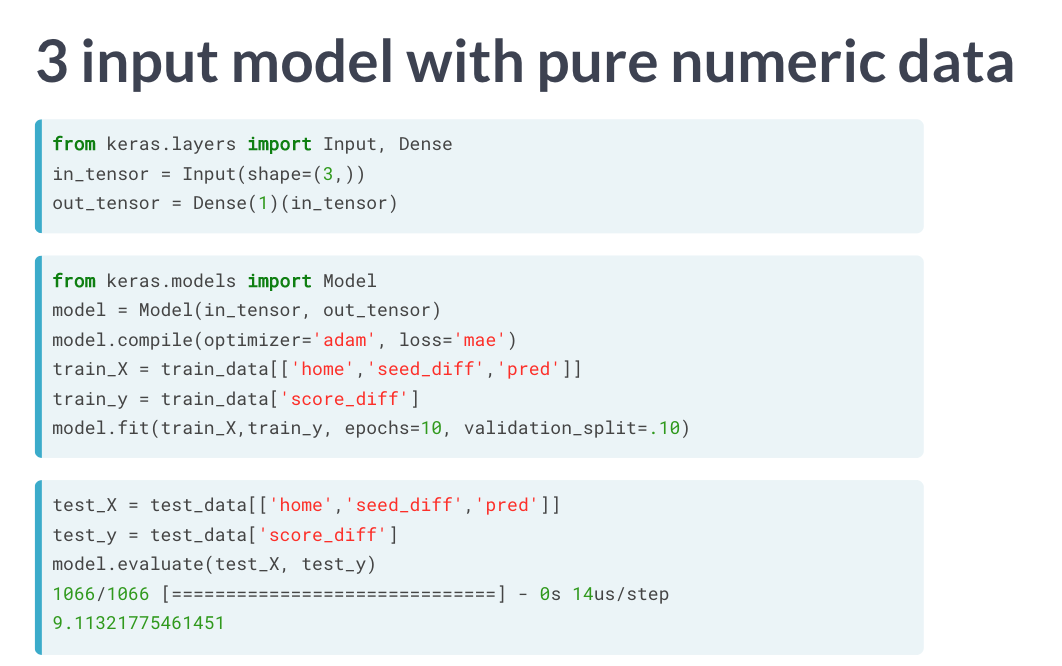

In [64]:
Image(filename='42.png')

In [ ]:
# # Predict
# games_tourney['pred'] = model.predict([games_tourney['team_1'],
#                                              games_tourney['team_2'],
#                                              games_tourney['home']])

In [ ]:
# # Create an input layer with 3 columns
# input_tensor = Input((3,))

# # Pass it to a Dense layer with 1 unit
# output_tensor = Dense(1)(input_tensor)

# # Create a model
# model = Model(input_tensor, output_tensor)

# # Compile the model
# model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# # Fit the model
# model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
#           games_tourney_train['score_diff'],
#           epochs=1,
#           verbose=True)

#     Epoch 1/1
    
#       32/3168 [..............................] - ETA: 22s - loss: 21.2439
#      480/3168 [===>..........................] - ETA: 1s - loss: 18.3645 
#      992/3168 [========>.....................] - ETA: 0s - loss: 18.1930
#     1632/3168 [==============>...............] - ETA: 0s - loss: 18.3717
#     2272/3168 [====================>.........] - ETA: 0s - loss: 18.1302
#     2880/3168 [==========================>...] - ETA: 0s - loss: 17.8814
#     3168/3168 [==============================] - 1s 163us/step - loss: 17.8145


In [ ]:
# # Evaluate the model on the games_tourney_test dataset
# print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'prediction']],
#                games_tourney_test['score_diff'], verbose=False))



# 4- Multiple Outputs


### Two-output models


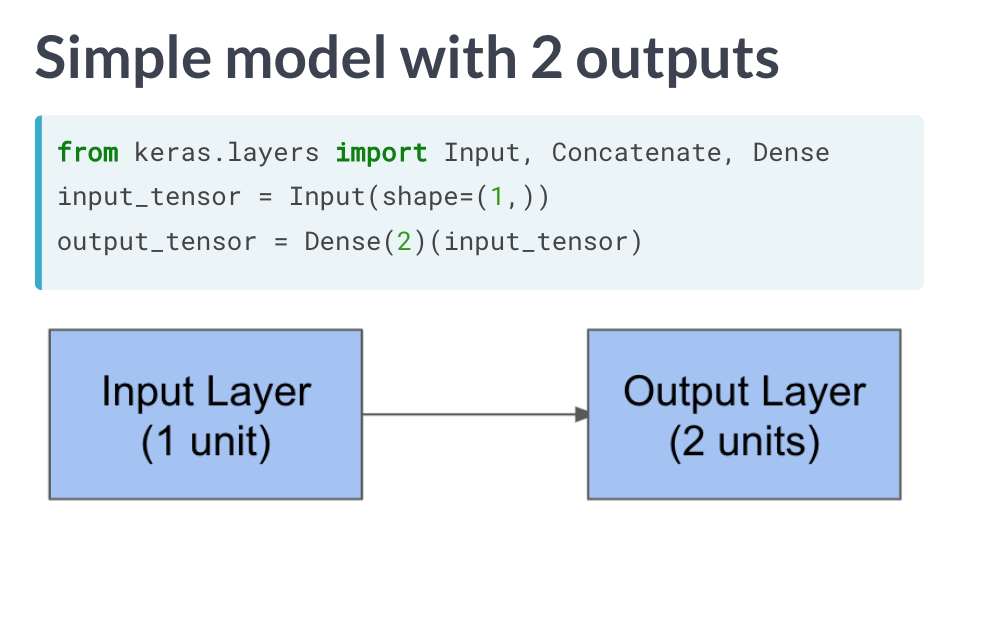

In [65]:
Image(filename='43.png')

In [66]:
Image(filename='44.png')

FileNotFoundError: [Errno 2] No such file or directory: '44.png'

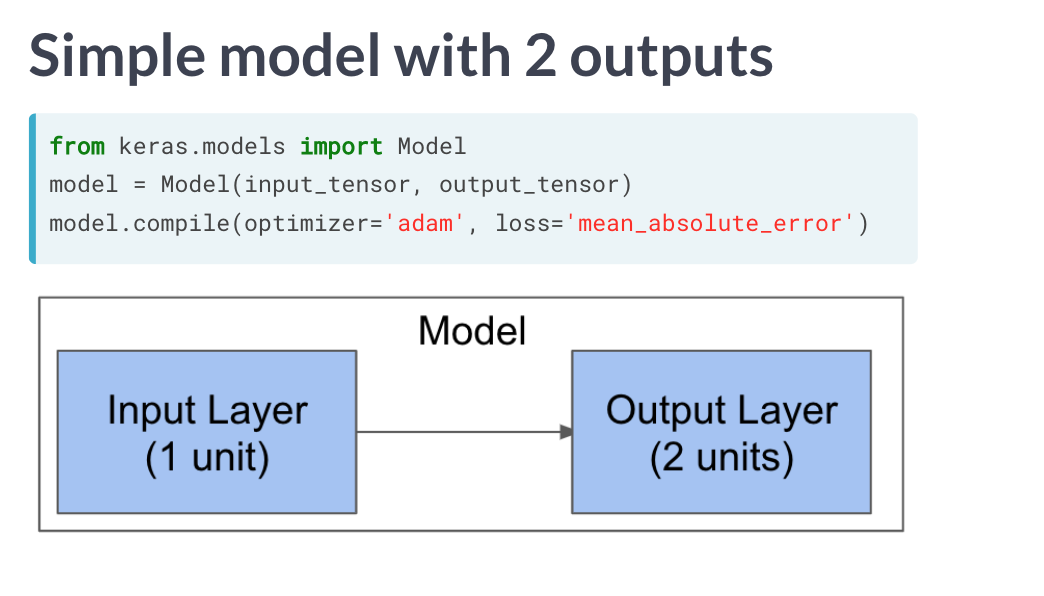

In [67]:
Image(filename='45.png')

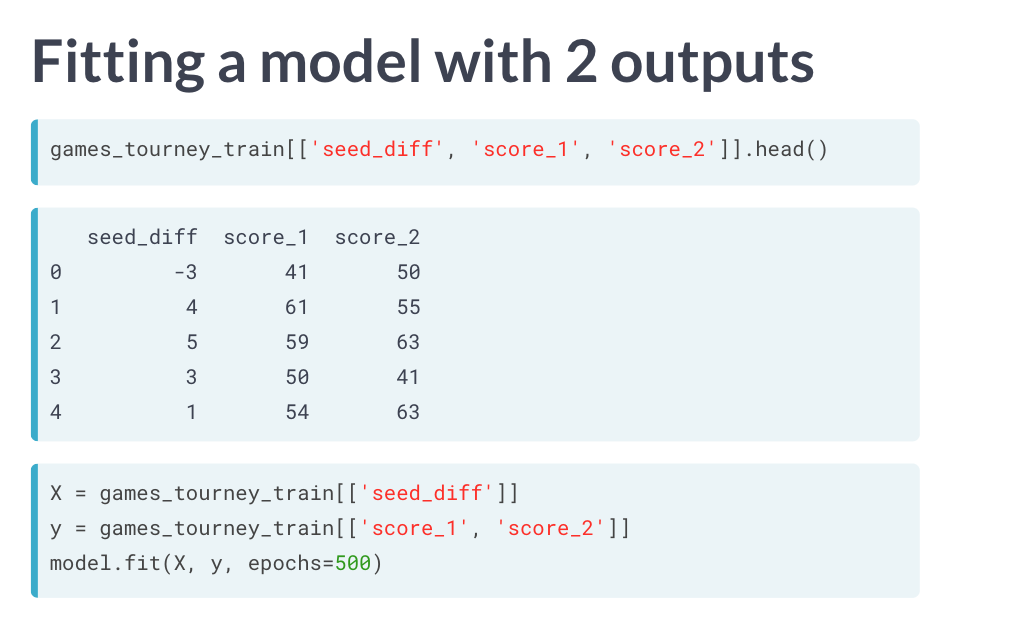

In [68]:
Image(filename='46.png')

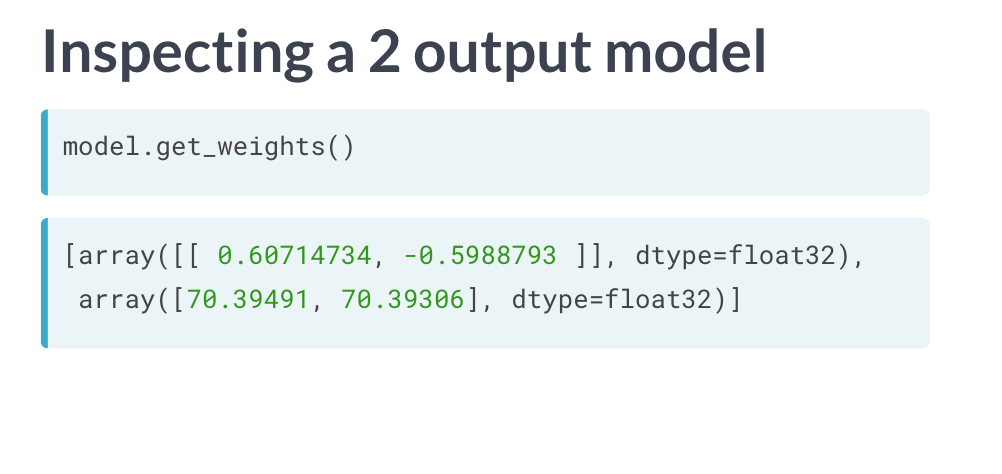

In [69]:
Image(filename='47.png')

In [ ]:
# # Define the input
# input_tensor = Input(shape=(2,))

# # Define the output
# output_tensor = Dense(2)(input_tensor)

# # Create a model
# model = Model(input_tensor, output_tensor)

# # Compile the model
# model.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
# model.fit(games_tourney_train[['seed_diff', 'pred']],
#   		  games_tourney_train[['score_1', 'score_2']],
#   		  verbose=True,
#           epochs=100,
#   		  batch_size=16384)

In [ ]:
# # Print the model's weights
# print(model.get_weights())

# # Print the column means of the training data
# print(games_tourney_train.mean())

# <script.py> output:
#     [array([[ 0.13067713, -0.10371894],
#            [ 0.38644195, -0.35632333]], dtype=float32), array([72.38115, 72.38473], dtype=float32)]
#     season        1.998074e+03
#     team_1        5.556771e+03
#     team_2        5.556771e+03
#     home          0.000000e+00
#     seed_diff     0.000000e+00
#     score_diff    0.000000e+00
#     score_1       7.162128e+01
#     score_2       7.162128e+01
#     won           5.000000e-01
#     pred         -1.625470e-14
#     dtype: float64


In [ ]:
# print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
#                games_tourney_test[['score_1', 'score_2']], verbose=False))

#     8.986760239102948


### Single model for classification and regression


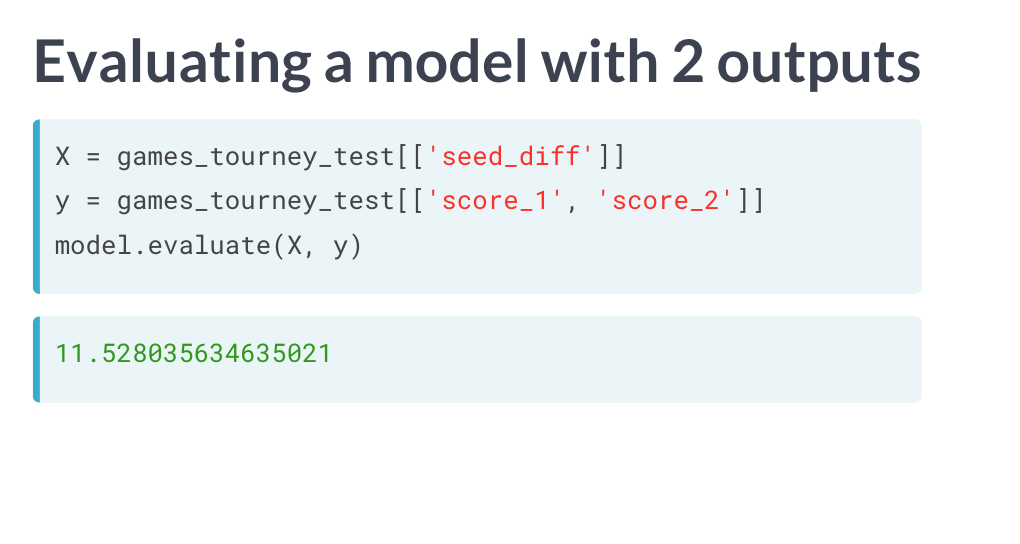

In [70]:
Image(filename='48.png')

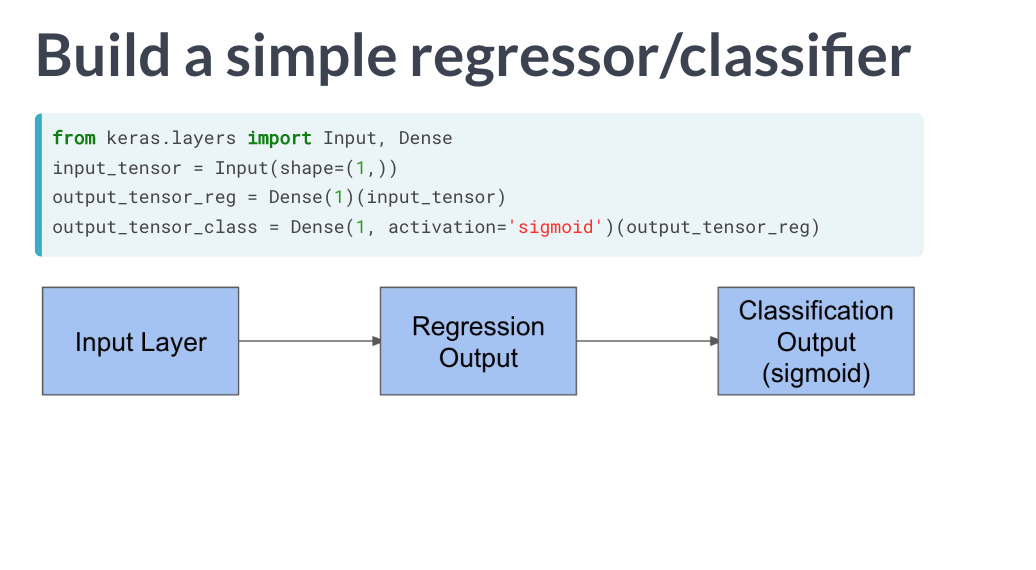

In [71]:
Image(filename='49.png')

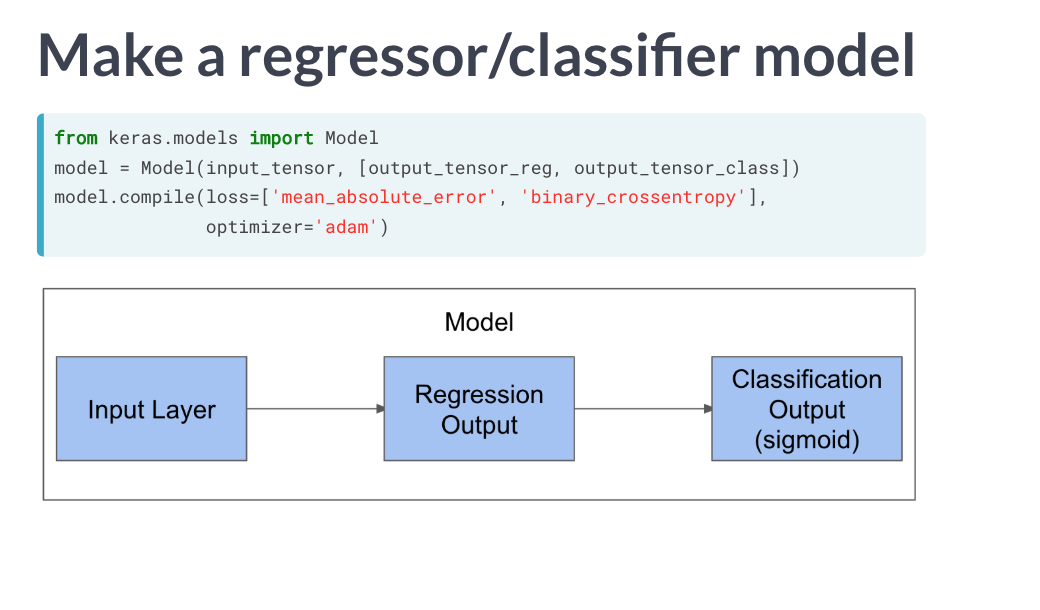

In [72]:
Image(filename='50.png')

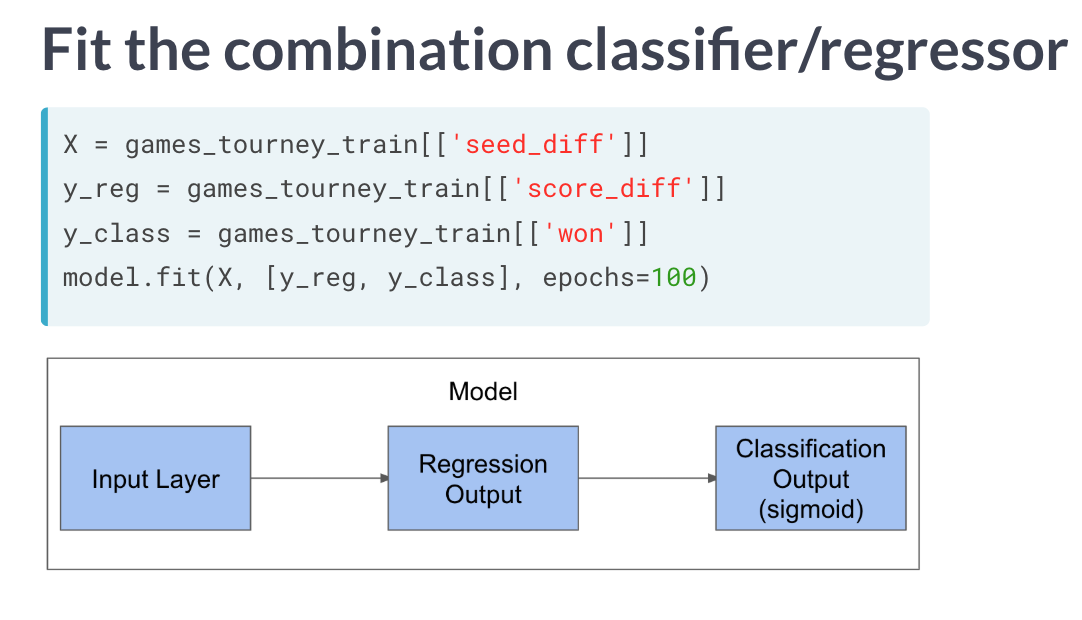

In [73]:
Image(filename='51.png')

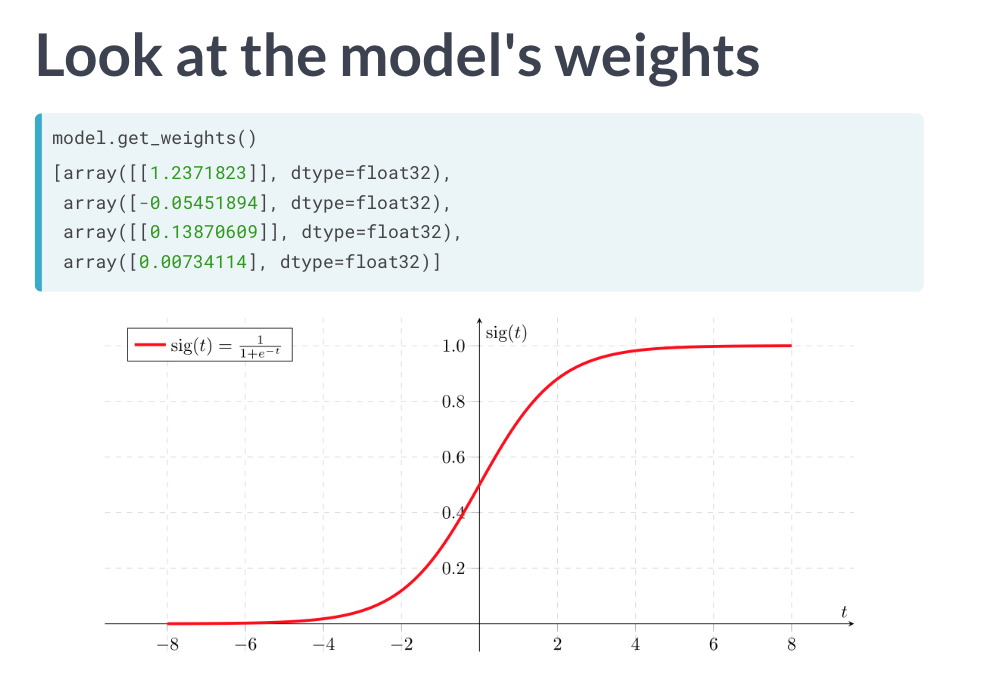

In [74]:
Image(filename='52.png')

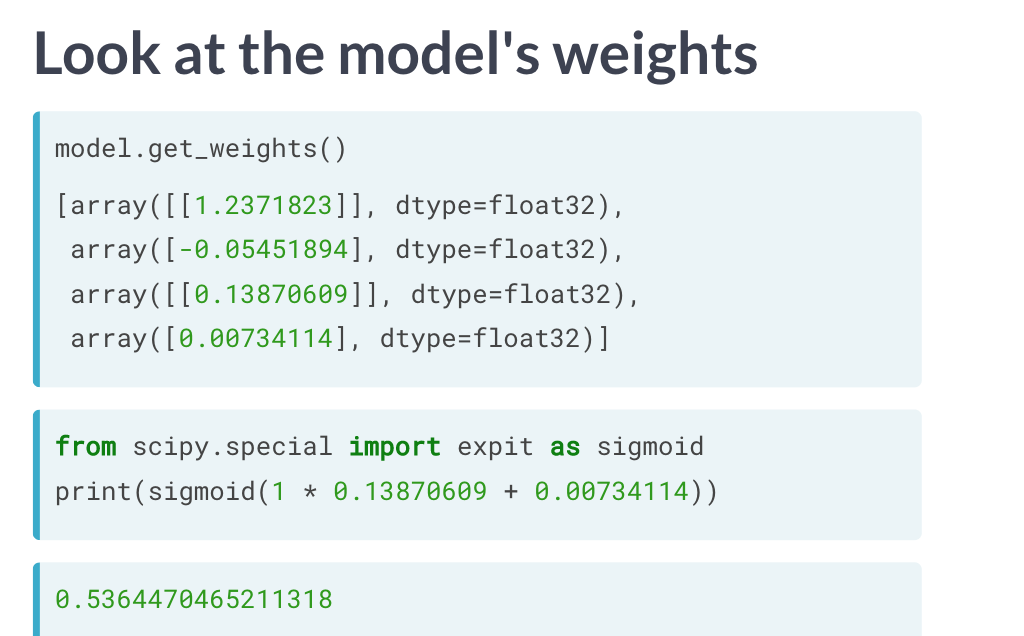

In [75]:
Image(filename='53.png')

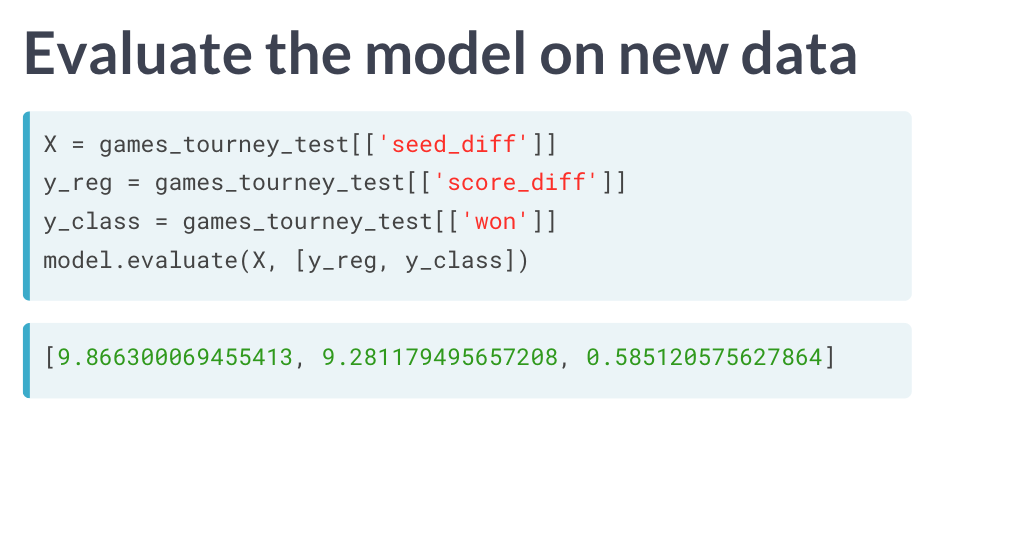

In [76]:
Image(filename='54.png')

In [ ]:
# # Create an input layer with 2 columns
# input_tensor = Input(shape=(2,))

# # Create the first output
# output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)

# # Create the second output (use the first output as input here)
# output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(output_tensor_1)

# # Create a model with 2 outputs
# model = Model(input_tensor, [output_tensor_1, output_tensor_2])

In [ ]:
# # Import the Adam optimizer
# from keras.optimizers import Adam

# # Compile the model with 2 losses and the Adam optimzer with a higher learning rate
# model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(.01))

# # Fit the model to the tournament training data, with 2 inputs and 2 outputs
# model.fit(games_tourney_train[['seed_diff', 'pred']],
#           [games_tourney_train[['score_diff']], games_tourney_train[['won']]],
#           epochs=10,
#           verbose=True,
#           batch_size=16384)

# <script.py> output:
#     Epoch 1/10
    
#     3430/3430 [==============================] - 0s 54us/step - loss: 9.5718 - dense_1_loss: 8.9779 - dense_2_loss: 0.5939
#     Epoch 2/10
    
#     3430/3430 [==============================] - 0s 1us/step - loss: 9.5437 - dense_1_loss: 8.9614 - dense_2_loss: 0.5823
#     Epoch 3/10
    
#     3430/3430 [==============================] - 0s 1us/step - loss: 9.5200 - dense_1_loss: 8.9480 - dense_2_loss: 0.5720
#     Epoch 4/10
    
#     3430/3430 [==============================] - 0s 1us/step - loss: 9.5004 - dense_1_loss: 8.9374 - dense_2_loss: 0.5630
#     Epoch 5/10
    
#     3430/3430 [==============================] - 0s 2us/step - loss: 9.4845 - dense_1_loss: 8.9291 - dense_2_loss: 0.5553
#     Epoch 6/10
    
#     3430/3430 [==============================] - 0s 2us/step - loss: 9.4731 - dense_1_loss: 8.9240 - dense_2_loss: 0.5491
#     Epoch 7/10
    
#     3430/3430 [==============================] - 0s 2us/step - loss: 9.4659 - dense_1_loss: 8.9216 - dense_2_loss: 0.5443
#     Epoch 8/10
    
#     3430/3430 [==============================] - 0s 2us/step - loss: 9.4616 - dense_1_loss: 8.9208 - dense_2_loss: 0.5408
#     Epoch 9/10
    
#     3430/3430 [==============================] - 0s 2us/step - loss: 9.4585 - dense_1_loss: 8.9201 - dense_2_loss: 0.5385
#     Epoch 10/10
    
#     3430/3430 [==============================] - 0s 1us/step - loss: 9.4562 - dense_1_loss: 8.9190 - dense_2_loss: 0.5372


In [ ]:
# # Print the model weights
# print(model.get_weights())

# # Print the training data means
# print(games_tourney_train.mean())

# <script.py> output:
#     [array([[0.9695341 ],
#            [0.22126554]], dtype=float32), array([[0.1428871]], dtype=float32)]
#     season        1.998074e+03
#     team_1        5.556771e+03
#     team_2        5.556771e+03
#     home          0.000000e+00
#     seed_diff     0.000000e+00
#     score_diff    0.000000e+00
#     score_1       7.162128e+01
#     score_2       7.162128e+01
#     won           5.000000e-01
#     pred         -1.625470e-14
#     dtype: float64


In [ ]:
# <script.py> output:
#     [array([[0.9695341 ],
#            [0.22126554]], dtype=float32), array([[0.1428871]], dtype=float32)]
#     season        1.998074e+03
#     team_1        5.556771e+03
#     team_2        5.556771e+03
#     home          0.000000e+00
#     seed_diff     0.000000e+00
#     score_diff    0.000000e+00
#     score_1       7.162128e+01
#     score_2       7.162128e+01
#     won           5.000000e-01
#     pred         -1.625470e-14
#     dtype: float64


In [ ]:
# # Evaluate the model on new data
# print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
#                [games_tourney_test[['score_diff']], games_tourney_test[['won']]], verbose=False))

# <script.py> output:
#     [9.685116468970456, 9.11585681592647, 0.5692595753503676]
